In [1]:
import apply_regressions
import ssm_write_fwinputs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root
from sklearn.metrics import root_mean_squared_error

In [2]:
regressions_df = pd.read_excel('data/regression_metadata.xlsx', header=None,
            usecols='A:Q', sheet_name='2014 WQ Regression Coeffs', names=(
                'Station','Temp','DO','pH','NO23N','NH4N','TPN','DTPN','PON',
                'DON','OP','TP','DTP','POP','DOP','DOC','POC'))
regressions_df.head()

Station      Temp        DO        pH     NO23N      NH4N       TPN  \
0  Big Beef Creek      Temp        DO        pH     NO23N      NH4N       TPN   
1       intercept  1.122196  1.006518  0.835242 -0.549755 -1.940607 -0.456522   
2        log(Q/A)  0.076524 -0.035623 -0.020314  0.196279  -0.01576  0.104816   
3       log(Q/A)2  0.005021 -0.007979 -0.001389  0.038751 -0.010157  0.017555   
4       sin(2pfy) -0.072889  0.023554  0.002844 -0.022705 -0.100739 -0.037316   

   DTPN  PON  DON        OP        TP  DTP  POP  DOP       DOC       POC  
0  DTPN  PON  DON        OP        TP  DTP  POP  DOP       DOC       POC  
1   NaN  NaN  NaN -2.302264 -0.699106  NaN  NaN  NaN -0.598844 -4.635928  
2   NaN  NaN  NaN -0.111527  1.020522  NaN  NaN  NaN -1.811061 -7.000537  
3   NaN  NaN  NaN  -0.00936  0.203446  NaN  NaN  NaN -0.746777 -2.680979  
4   NaN  NaN  NaN -0.163039 -0.179667  NaN  NaN  NaN -0.132577  0.017671

In [3]:
regressions = apply_regressions.RegData(regressions_df)._regressions
bs = regressions['Big Beef Creek']['NO23N']
bs

array([-0.549754757575652, 0.196278788758363, 0.0387508661647747,
       -0.0227052127320647, 0.107036772127436, 0.0688255229969559,
       0.109066746861192, 1.03094652750779, 0.396], dtype=object)

In [4]:
dfs = ssm_write_fwinputs.read_data('data/ssm_fwinputs_2014.xlsx')

Test the basic regression compution with a single source (Kitsap_Hood), single constituent (NO3)

In [5]:
kitsap_hood_data = dfs['data'].loc[(slice(None),9784), :]

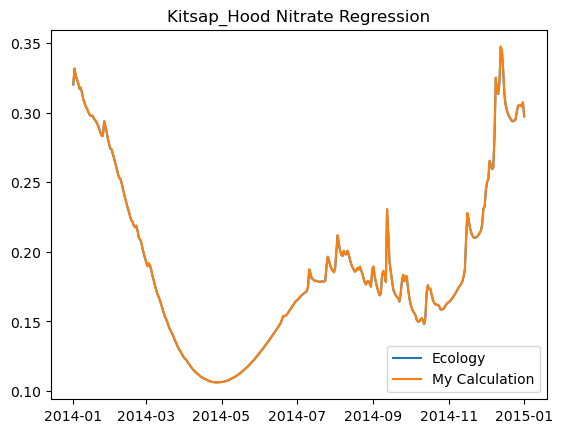

In [6]:
dates = kitsap_hood_data.index.get_level_values(0)

x = [kitsap_hood_data['discharge'].values / (49.915 * 1.6 ** 2), apply_regressions.dates_to_year_frac(dates)]
predict_no3 = apply_regressions.do_regression(x, *bs)
ecology_no3 = kitsap_hood_data['no32'].values

fig, ax = plt.subplots()
ax.plot(dates, ecology_no3, label='Ecology')
ax.plot(dates, predict_no3, label='My Calculation')
ax.set_title('Kitsap_Hood Nitrate Regression')
ax.legend();

In [7]:
ecology_no3/predict_no3

array([0.99891469, 0.99864488, 0.99876859, 0.99865366, 0.99894834,
       0.99873503, 0.99890686, 0.99884751, 0.99910262, 0.99916289,
       0.99917967, 0.99913729, 0.99905208, 0.99929215, 0.99908027,
       0.99923102, 0.99931948, 0.99920443, 0.99908892, 0.99924827,
       0.99916577, 0.99912883, 0.99921652, 0.99936199, 0.99936424,
       0.99917055, 0.99891311, 0.99899703, 0.99899733, 0.99933854,
       0.99927816, 0.99904516, 0.99908456, 0.99937052, 0.99929439,
       0.9993166 , 0.99940803, 0.99912752, 0.99912005, 0.99905339,
       0.99932513, 0.99937675, 0.99943081, 0.99916706, 0.9994138 ,
       0.99950898, 0.99940022, 0.99959038, 0.99916722, 0.99952575,
       0.99939219, 0.99926594, 0.99941631, 0.99945663, 0.9990528 ,
       0.99936545, 0.9992548 , 0.99924008, 0.99914995, 0.99901014,
       0.99909309, 0.99935563, 0.99884254, 0.99933458, 0.99926662,
       0.9991894 , 0.99944339, 0.99950046, 0.99921204, 0.99912575,
       0.99940785, 0.99931709, 0.99954938, 0.99948398, 0.99908

In [8]:
# Need to drop Deschutes River row to prevent a duplicate entry
inflows_df = pd.read_excel('data/regression_metadata.xlsx', sheet_name='SSM list of inflows').drop_duplicates(subset='SSM2_ID').set_index('SSM2_ID')

inflows_df.head()

SSM2_Name       Region Country SiteSpecific Regression  \
SSM2_ID                                                               
301         Agate East  South_Sound     USA                     NaN   
302         Agate West  South_Sound     USA                     NaN   
303      Anderson east  South_Sound     USA                     NaN   
304      Anderson west  South_Sound     USA                     NaN   
305          Artondale  South_Sound     USA                     NaN   

        SiteSpecific Gage   WQ Regression               Scale Gage  \
SSM2_ID                                                              
301                   NaN   Skookum Creek  Goldsborough (12076800)   
302                   NaN   Skookum Creek  Goldsborough (12076800)   
303                   NaN  Woodland Creek          Huge (12073500)   
304                   NaN  Woodland Creek          Huge (12073500)   
305                   NaN    Burley Creek          Huge (12073500)   

              WQ Regression Method  Precip. (in)  Drainage Area (mi2)  \
SSM2_ID                                                                 
301      1) DTPN and DTP available     61.947035             5.565686   
302      1) DTPN and DTP available     61.947035             0.969280   
303      1) DTPN and DTP available     42.935034             1.985738   
304      1) DTPN and DTP available     42.780495             6.101473   
305      1) DTPN and DTP available     49.189321            11.974591   

               Temperature basis Alkalinity basis  SPS_ID       SPS_Name  \
SSM2_ID                                                                    
301      Cedar River temperature    Skookum Creek   137.0        Mill Cr   
302      Cedar River temperature   Sherwood Creek   142.0    Campbell Cr   
303      Cedar River temperature   Woodland Creek   169.0  Anderson east   
304      Cedar River temperature   Woodland Creek   170.0  Anderson west   
305      Cedar River temperature     Burley Creek   165.0      Artondale   

         PSDOM_ID       PS_Name  
SSM2_ID                          
301         214.0  Goldsborough  
302         215.0   Oakland Bay  
303         220.0    Carr south  
304         208.0    McAllister  
305         220.0    Carr south

Copy the data from dfs/data

For each unique FVCOM ID:
 * Get the node(s) associated with the source
 * Get the total discharge across all nodes by date
 * From the list of inflows, find the name of the regression to use and the drainage area
 * Calculate Q/A using drainage area
 * For each constituent:
    * Get the coefficients
    * Apply the regression model to the data to get time series of concentrations
    * Replace concentrations in the data copy with the newly calculated ones

In [9]:
newdata = dfs['data'].copy()

# Fraction of concentration which is labile
lr_fractions = {
    'doc': 0.9,
    'poc': 0.67,
    'don': 1,
    'pon': 1,
    'dop': 1,
    'pop': 1
}

# Carbonate equilibrium constants
ka1 = 10 ** -6.35
ka2 = 10 ** -10.33

constit_map = {
    # Don't alter temperature, salt, tss, algn, zoon, urea, psi, dsi, talk
    'temp': 'Temp',
    'doc': 'DOC',
    'poc': 'POC',
    'nh4': 'NH4N',
    'no32': 'NO23N',
    'don': 'DON',
    'pon': 'PON',
    # Phosphate is complicated
    'po4': 'OP',
    'doxg': 'DO'
    # pH to DIC is handled separately
}

def pick_regression(name, regname, regc):
    if regname in regressions:
        return regressions[regname][regc], regname
    # Sloppiness in spreadsheet
    if name in regressions:
        return regressions[name][regc], name
    if name in ('Kitsap NE', 'Kitsap_Hood', 'Port Gamble'):
        #actual_regname = 'Sinclair/Dyes Inlet' if regc in ('DOC','POC') else 'Big Beef Creek'
        actual_regname = 'Big Beef Creek'
    elif name == 'Hamma Hamma R':
        actual_regname = 'Duckabush River' if regc in ('DOC','POC') else 'Skokomish River'
    elif name == 'NW Hood':
        actual_regname = 'Duckabush River' if regc in ('DOC','POC') else 'Big Beef Creek'
    elif name == 'Skokomish R':
        #actual_regname = 'Skookum Creek' if regc in ('POC') else 'Skokomish River'
        actual_regname = 'Skokomish River'
    else:
        # TODO raise a ValueError
        print(f'{name} {regname} {regc}')
        return None, None
    return regressions[actual_regname][regc], actual_regname

for sid,group in dfs['nodes'].loc[dfs['nodes']['Source Type'] == 'River'].groupby('FVCOM ID'):
    nodes = group.index.values
    name = inflows_df.loc[sid, 'SSM2_Name']
    regname = inflows_df.loc[sid, 'WQ Regression']
    print(f'{sid}: {name}')
    if pd.isnull(regname):
        print('Skipping all regressions')
        continue
    q = newdata.loc[newdata.index.get_level_values(1).isin(nodes), 'discharge']
    a = inflows_df.loc[sid, 'Drainage Area (mi2)'] * 1.6093 ** 2
    x = [q.groupby(level=0).sum() / a, apply_regressions.dates_to_year_frac(q.index.levels[0])]
    for inputc, regc in constit_map.items():
        bs, actual_regname = pick_regression(name, regname, regc)
        if np.all(pd.isnull(bs)):
            # No regression available, do not change original data
            print(f'Skipping {regc} (not available for {actual_regname})')
            continue
        p = apply_regressions.do_regression(x, *bs)
        if inputc not in newdata.columns and 'l' + inputc in newdata.columns:
            # Proportion the concentrations into labile and refractory fractions
            print(f'Updating {regc} labile and refractory (using {actual_regname})')
            for n in nodes:
                newdata.loc[(slice(None),n), 'l' + inputc] = lr_fractions[inputc] * p
                newdata.loc[(slice(None),n), 'r' + inputc] = (1 - lr_fractions[inputc]) * p
        else:
            print(f'Updating {regc} (using {actual_regname})')
            for n in nodes:
                newdata.loc[(slice(None),n), inputc] = p
    # pH
    bs, actual_regname = pick_regression(name, regname, 'pH')
    if np.all(pd.isnull(bs)):
        print(f'Skipping pH (not available in {actual_regname})')
    else:
        p = apply_regressions.do_regression(x, *bs)
        hpl = 10 ** -p
        ohm = 10 ** (p-14)
        # Alkalinity doesn't vary by year so just use what we have already
        alk = newdata.loc[(slice(None),nodes[0]), 'talk'].to_numpy()
        # Assume alkalinity is dominated by the carbonate system
        # We could include ammonium and phosphate species but these should be rounding errors
        # Eq 5.39 and 5.40 from Benjamin
        alph1 = 1 / (hpl / ka1 + 1 + ka2 / hpl)
        alph2 = 1 / (hpl ** 2 / (ka1 * ka2) + hpl / ka2 + 1)
        # Eq 8.21b from Benjamin
        dic = ((alk + hpl - ohm) / (alph1 + alph2))
        print(f'Updating pH (using {actual_regname})')
        for n in nodes:
            newdata.loc[(slice(None),n), 'dic'] = dic

301: Agate East
Updating Temp (using Skookum Creek)
Updating DOC labile and refractory (using Skookum Creek)
Updating POC labile and refractory (using Skookum Creek)
Updating NH4N (using Skookum Creek)
Updating NO23N (using Skookum Creek)
Updating DON labile and refractory (using Skookum Creek)
Updating PON labile and refractory (using Skookum Creek)
Updating OP (using Skookum Creek)
Updating DO (using Skookum Creek)
Updating pH (using Skookum Creek)
302: Agate West
Updating Temp (using Skookum Creek)
Updating DOC labile and refractory (using Skookum Creek)
Updating POC labile and refractory (using Skookum Creek)
Updating NH4N (using Skookum Creek)
Updating NO23N (using Skookum Creek)
Updating DON labile and refractory (using Skookum Creek)
Updating PON labile and refractory (using Skookum Creek)
Updating OP (using Skookum Creek)
Updating DO (using Skookum Creek)
Updating pH (using Skookum Creek)
303: Anderson east
Updating Temp (using Woodland Creek)
Updating DOC labile and refractory

/home/benr/mambaforge/envs/ssm-analysis/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/benr/src/ssm-analysis/input_files/apply_regressions.py:214: RuntimeWarning: invalid value encountered in matmul
  predict_log = bs0[0] + (np.array([np.log10(q), np.log10(q) ** 2,


Next, make scatter plots of original to recomputed values to see how accurate my calculations are to Ecology's work

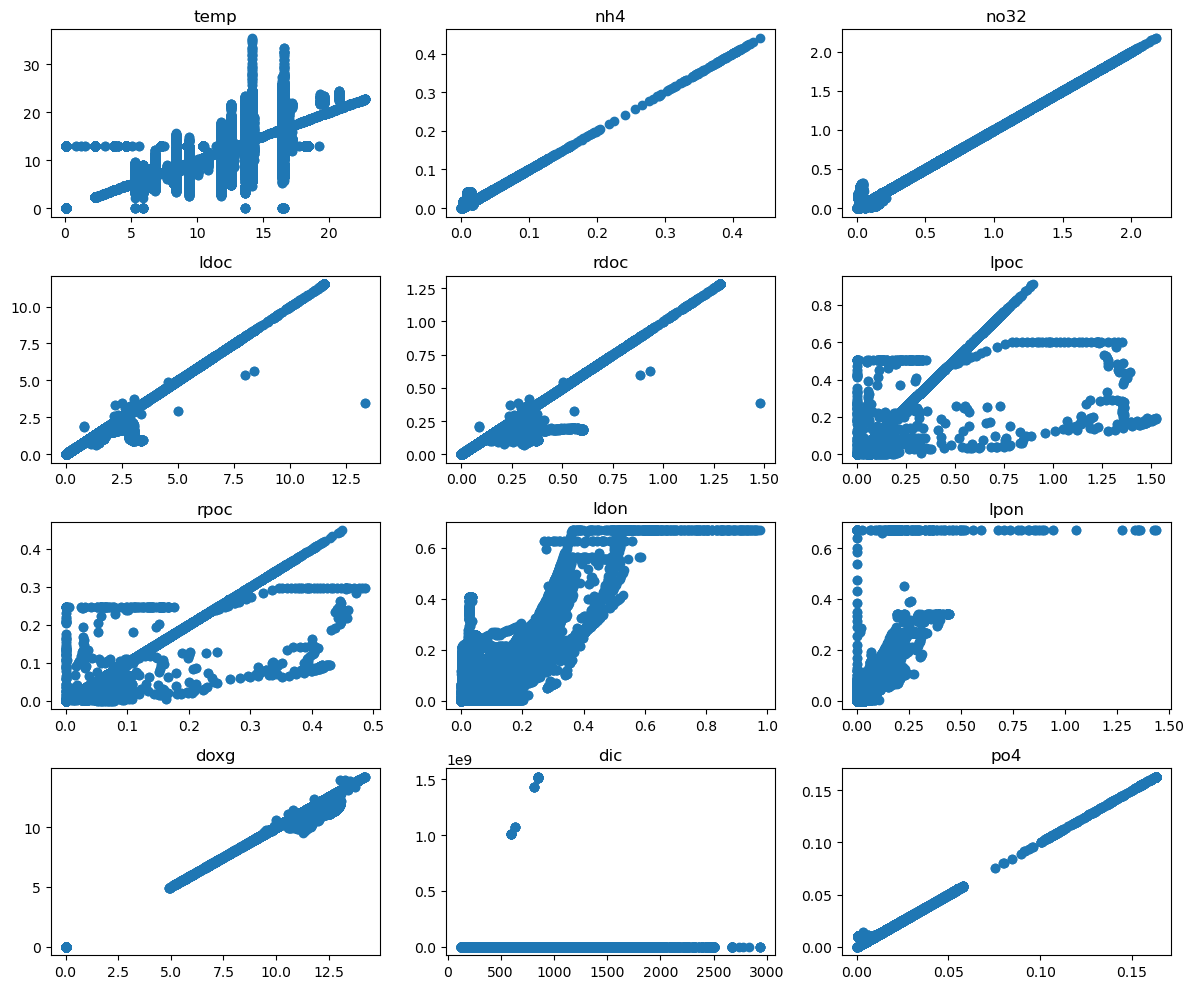

In [10]:
fig, axs = plt.subplots(4, 3, figsize=(12,10))

riv_nodes = dfs['nodes'].loc[dfs['nodes']['Source Type'] == 'River'].index
rivs_only_orig = dfs['data'].loc[np.isin(dfs['data'].index.get_level_values(1), riv_nodes)].sort_index()
rivs_only_new = newdata.loc[np.isin(newdata.index.get_level_values(1), riv_nodes)].sort_index()
for ax,constit in zip(axs.flatten(), ('temp','nh4','no32','ldoc','rdoc','lpoc','rpoc','ldon','lpon','doxg','dic','po4',None)):
    if constit is None:
        break
    ax.scatter(rivs_only_orig[constit], rivs_only_new[constit])
    ax.set_title(constit)
fig.tight_layout()

Note how poor the temperature fit is, and how in some cases it rises unrealistically high (excess of 30 C). Ecology used Cedar River measured temperatures instead of the regressions.

Okay, which sources have high errors for nitrate?

In [11]:
resids = (newdata['no32'] - dfs['data']['no32'])
resids.loc[np.abs(resids) > newdata['no32'] * 0.01].index.get_level_values(1).drop_duplicates()

Index([10991, 10992, 12872, 12873, 8554, 8778, 8861], dtype='int64', name='Node')

10991 and 10992 are Lake Washington, which uses directly measured data rather than the regression.
12872 and 12873 are Hamma Hamma River.
8554 is NW Hood.
8778 and 8861 are Fraser River, which is probably using directly measured data.

How about labile DOC?

In [12]:
resids = (newdata['ldoc'] - dfs['data']['ldoc'])
resids.loc[np.abs(resids) > newdata['ldoc'] * 0.01].index.get_level_values(1).drop_duplicates()

Index([15856, 15873, 10991, 10992, 8778, 8861, 13429], dtype='int64', name='Node')

The new nodes here, 15856 and 15873, are Capitol Lake. 

In [13]:
inflows_df.loc[315]

SSM2_Name                                 Capitol Lake
Region                                     South_Sound
Country                                            USA
SiteSpecific Regression                            NaN
SiteSpecific Gage                                OTHER
WQ Regression                             Capitol Lake
Scale Gage                        Deschutes (12080010)
WQ Regression Method       3) No DTPN or DTP available
Precip. (in)                                 56.594857
Drainage Area (mi2)                         169.024104
Temperature basis              Cedar River temperature
Alkalinity basis                          Capitol Lake
SPS_ID                                           121.0
SPS_Name                                   Deschutes R
PSDOM_ID                                         209.0
PS_Name                                 Budd/Deschutes
Name: 315, dtype: object

In [14]:
resids = (newdata['lpoc'] - dfs['data']['lpoc'])
resids.loc[np.abs(resids) > newdata['lpoc'] * 0.03].index.get_level_values(1).drop_duplicates()

Index([15856, 15873, 7864, 10991, 10992, 9784, 8279], dtype='int64', name='Node')

7864 is Kitsap NE.
9784 is Kitsap_Hood.
8279 is Port Gamble.

These are all of the exception cases for DOC and/or POC! Further investigation showed that there is a high percent error when the estimated and original values are both small, so this is just a quirk of the detection method. The bigger issue is Capitol Lake and Lake Washington which keep showing up.

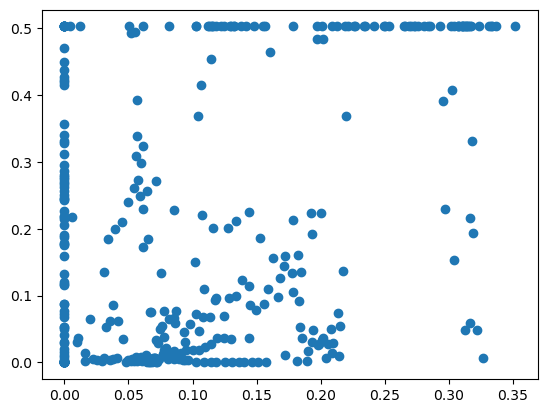

In [15]:
onesrc_orig = dfs['data'].xs(10991, level=1)
onesrc_new = newdata.xs(10991, level=1)
fig, ax = plt.subplots()
ax.scatter(onesrc_orig['lpoc'],
           onesrc_new['lpoc']);

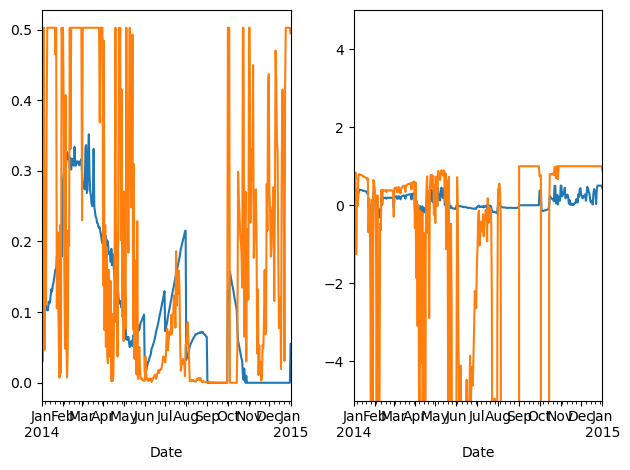

In [16]:
fig, axs = plt.subplots(1, 2)
onesrc_orig['lpoc'].plot(ax=axs[0])
onesrc_new['lpoc'].plot(ax=axs[0])
resids = (onesrc_new['lpoc'] - onesrc_orig['lpoc'])
resids.plot(ax=axs[1])
(resids / onesrc_new['lpoc']).plot(ax=axs[1])
axs[1].set_ybound(-5, 5)
fig.tight_layout()

What's going on here? Both Capitol Lake and Lake Washington are using measured data from the lakes rather than the regressions. It makes sense that the regressions would not work well for these sources since lake behavior (and thus the constituents in its discharges) behave quite differently than rivers.

So let's set these sources aside for now and evaluate how good my fitting process is at replicating Ecology's work.

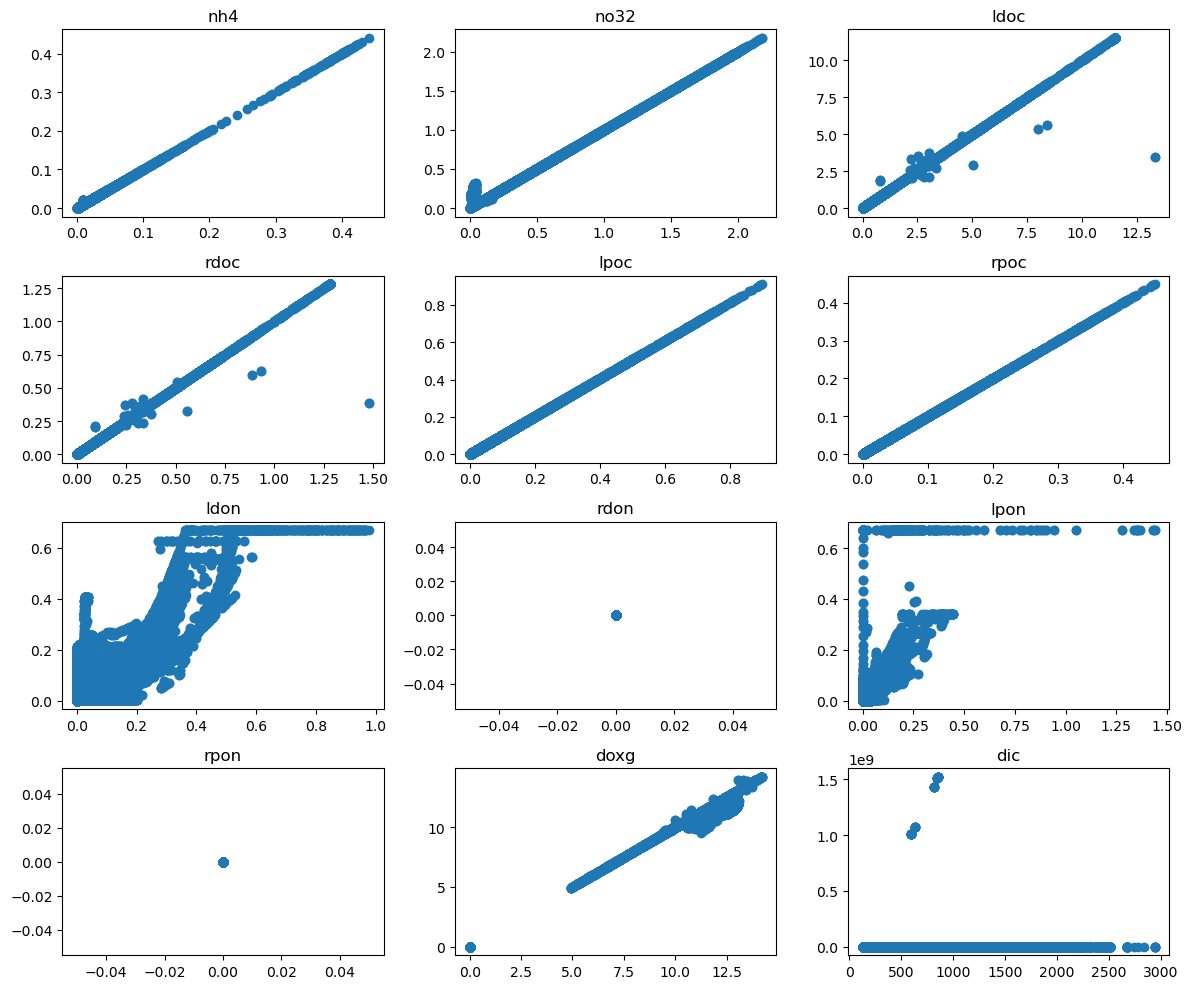

In [17]:
fig, axs = plt.subplots(4, 3, figsize=(12,10))

riv_nodes = dfs['nodes'].loc[(dfs['nodes']['Source Type'] == 'River') & ~np.isin(dfs['nodes'].index, (15856,15873,10991,10992))].index
rivs_only_orig = dfs['data'].loc[np.isin(dfs['data'].index.get_level_values(1), riv_nodes)].sort_index()
rivs_only_new = newdata.loc[np.isin(newdata.index.get_level_values(1), riv_nodes)].sort_index()
for ax,constit in zip(axs.flatten(), ('nh4','no32','ldoc','rdoc','lpoc','rpoc','ldon','rdon','lpon','rpon','doxg','dic')):
    ax.scatter(rivs_only_orig[constit], rivs_only_new[constit])
    ax.set_title(constit)
fig.tight_layout()

Okay, so Capitol Lake and Lake WA are only problematic in regards to organic carbon, which makes sense because these lakes are productive. But there are still problematic fit issues with organic nitrogen and DIC which I have to track down.

In [18]:
resids = (newdata['ldon'] - dfs['data']['ldon'])
resids.loc[np.abs(resids) > newdata['ldon'] * 0.03].index.get_level_values(1).drop_duplicates()

Index([15634, 15936, 14437, 14689, 14177, 15086, 15551, 15996, 14249, 15913,
       ...
       13833, 13834,  8778,  8861,  8059,  8610,  8533,  9968,  5982,  1915],
      dtype='int64', name='Node', length=104)

That's 63 nodes with issues, suggesting a serious problem.

It looks like the issue is that many regressions calculate DON using a DTPN regression when it's available, and other times using a TPN regression, to compute OrgN. Then DON and PON are based on OrgN.

There's also a problem that some river sources don't have drainage areas listed in Ecology's data they provided. Most are not near Puget Sound but one is: Cushman No 2. This is the diversion of Lake Cushman through power houses at the dam described in Bounding Scenarios Appendix B. That document has a statement about the water quality being assumed to be the same as the Skokomish River, so first let's just see if the original concentrations for Cushman match those of Skokomish.

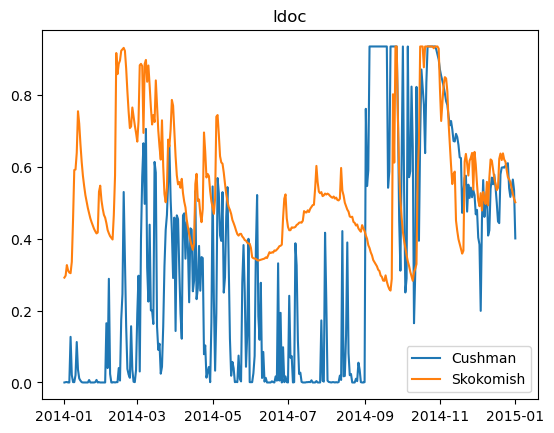

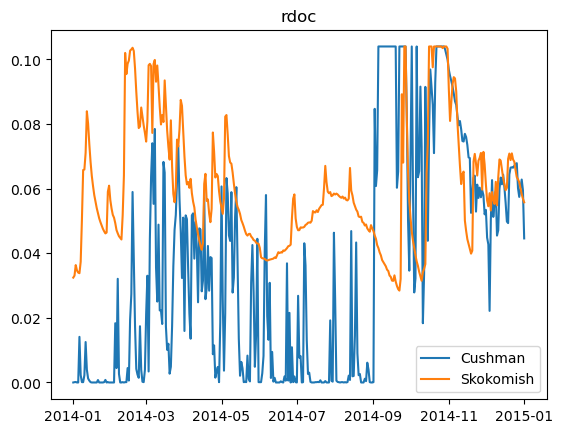

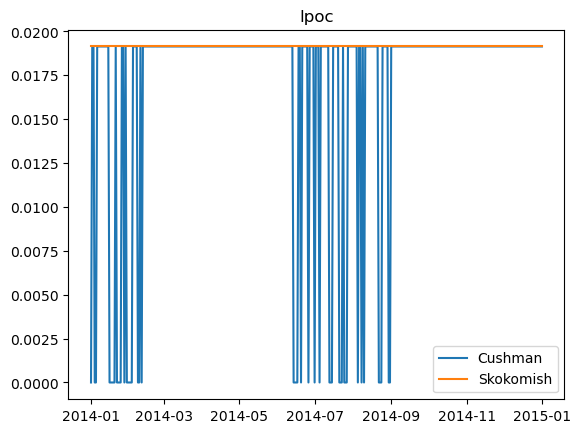

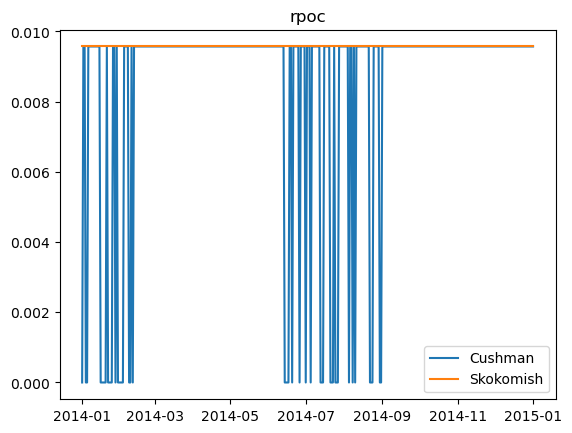

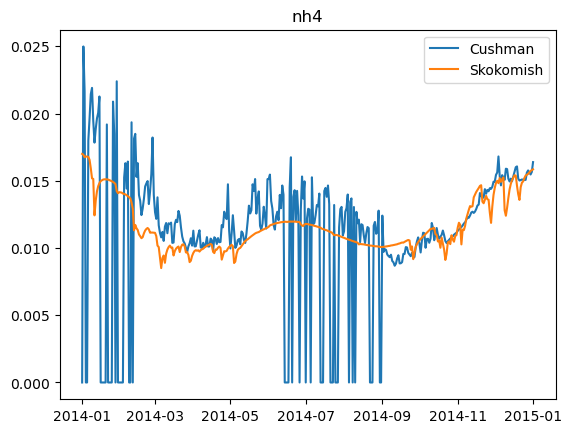

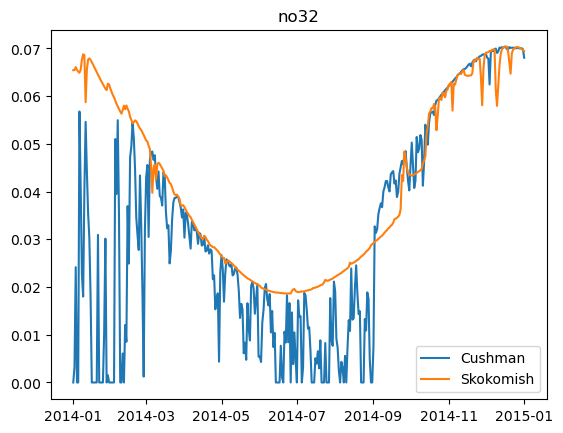

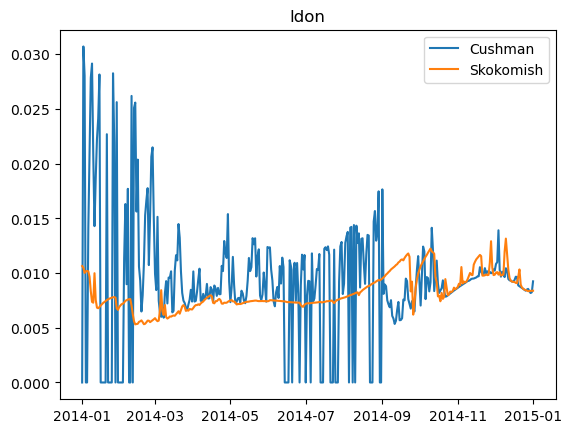

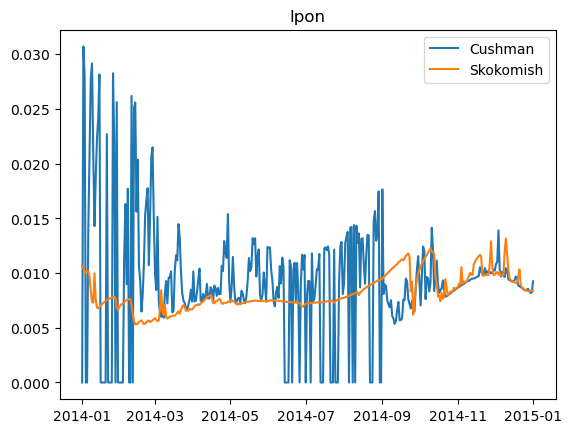

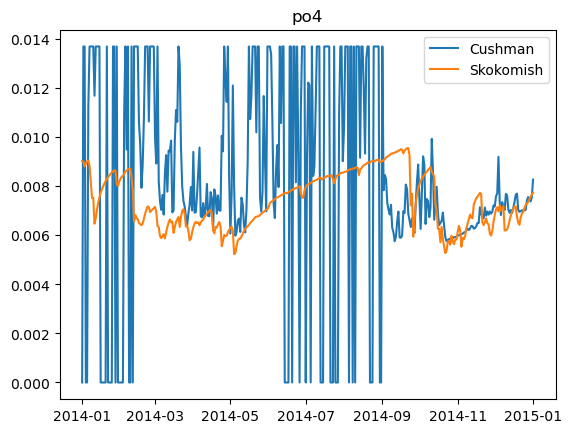

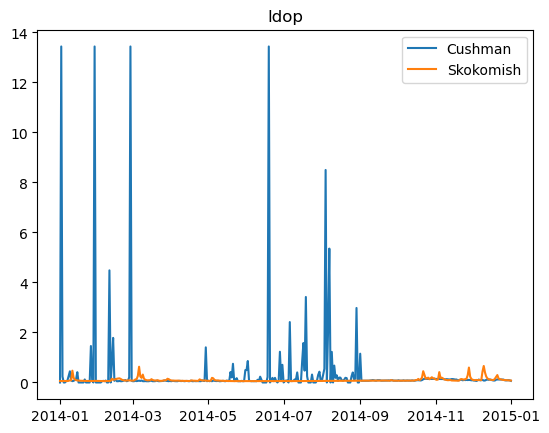

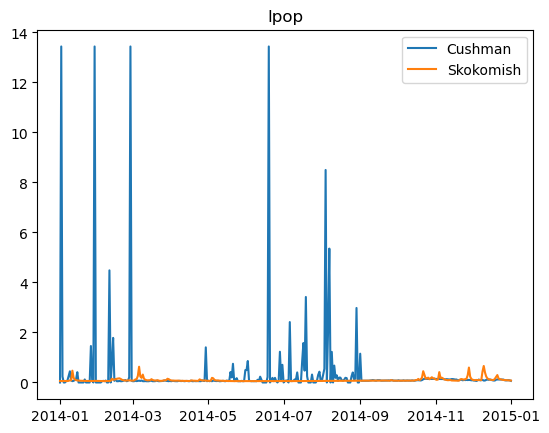

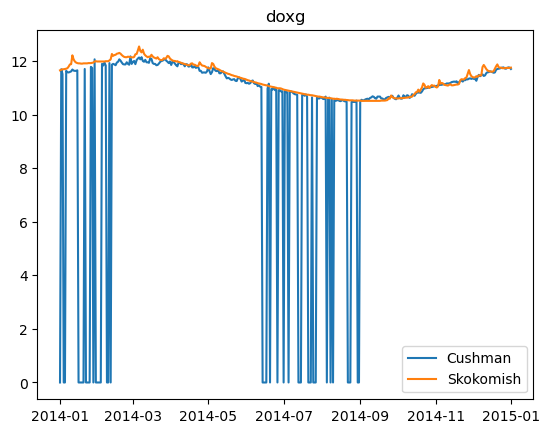

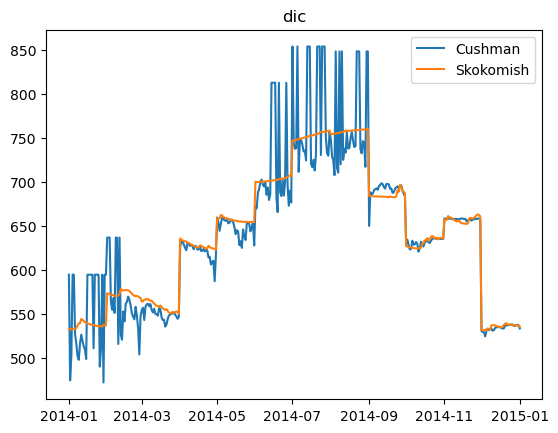

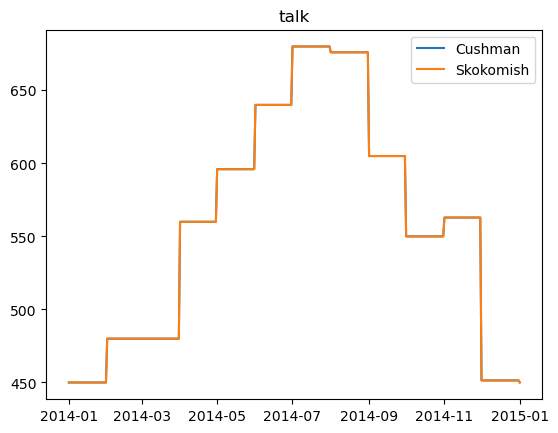

In [19]:
for c in dfs['data'].columns[9:]:
    cush = dfs['data'].loc[(slice(None), 13429), :][c]
    skok = dfs['data'].loc[(slice(None), 14138), :][c]
    if np.all(skok == 0):
        continue
    fig, ax = plt.subplots()
    ax.plot(dates, cush, label='Cushman')
    ax.plot(dates, skok, label='Skokomish')
    ax.set_title(c)
    ax.legend()

Clearly they are not identical, except for alkalinity which is expected. To begin investigating this, first see if I can find the "drainage area" number empirically using Ecology's calculated concentrations.

/home/benr/src/ssm-analysis/input_files/apply_regressions.py:214: RuntimeWarning: divide by zero encountered in log10
  predict_log = bs0[0] + (np.array([np.log10(q), np.log10(q) ** 2,
/home/benr/src/ssm-analysis/input_files/apply_regressions.py:214: RuntimeWarning: invalid value encountered in matmul
  predict_log = bs0[0] + (np.array([np.log10(q), np.log10(q) ** 2,
/home/benr/src/ssm-analysis/input_files/apply_regressions.py:214: RuntimeWarning: divide by zero encountered in log10
  predict_log = bs0[0] + (np.array([np.log10(q), np.log10(q) ** 2,
/home/benr/src/ssm-analysis/input_files/apply_regressions.py:214: RuntimeWarning: invalid value encountered in matmul
  predict_log = bs0[0] + (np.array([np.log10(q), np.log10(q) ** 2,
/home/benr/src/ssm-analysis/input_files/apply_regressions.py:214: RuntimeWarning: divide by zero encountered in log10
  predict_log = bs0[0] + (np.array([np.log10(q), np.log10(q) ** 2,
/home/benr/src/ssm-analysis/input_files/apply_regressions.py:214: RuntimeWa

Temp         0.524
DOC          0.001
POC          0.016
NH4N         0.000
NO23N        0.000
DON         99.281
PON         99.281
OP           0.000
DO           0.000


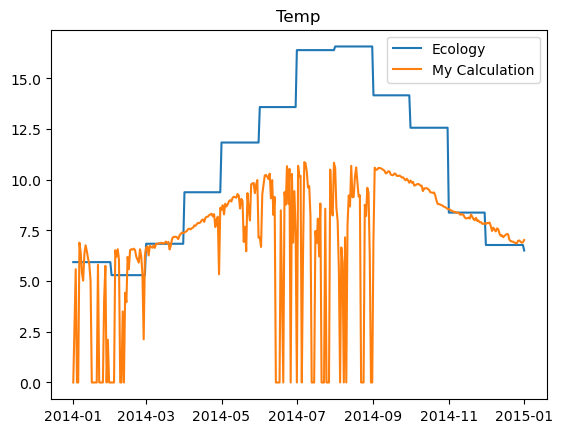

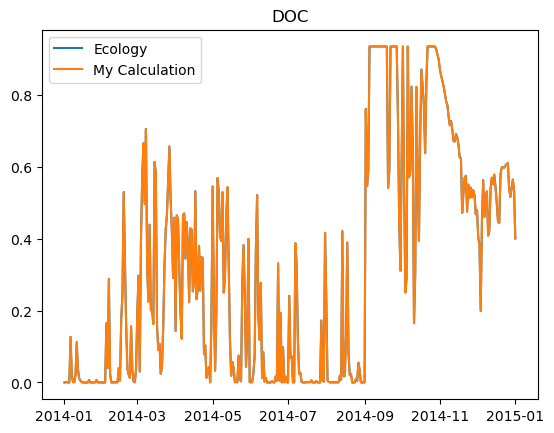

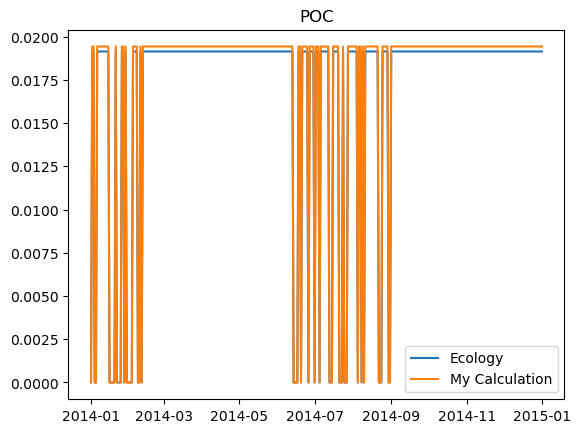

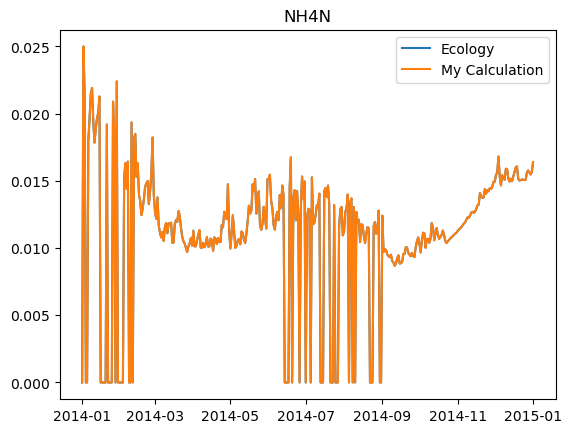

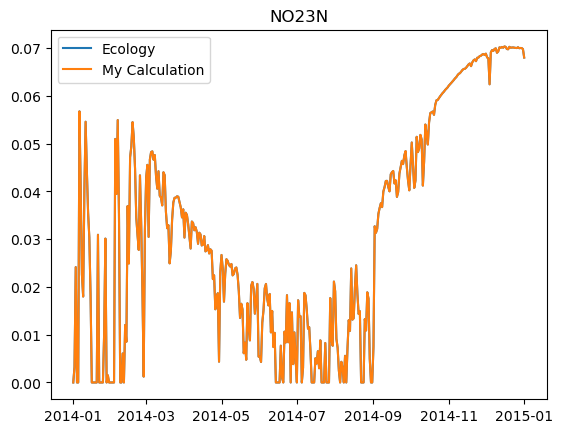

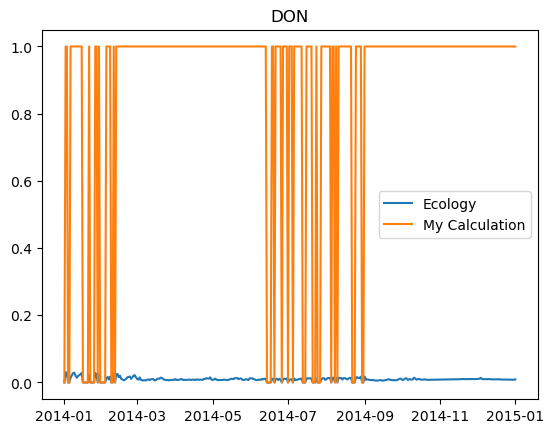

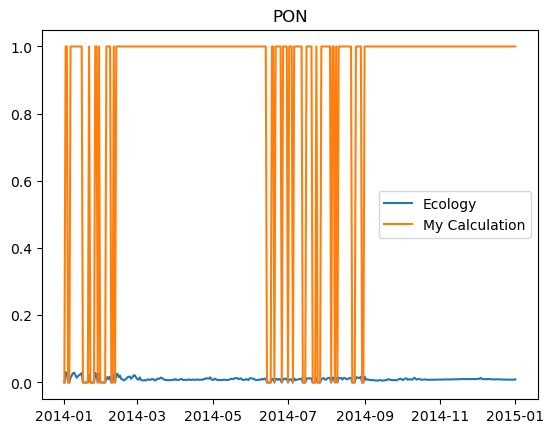

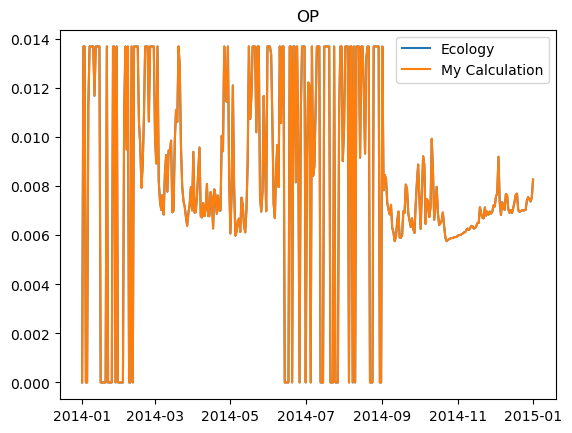

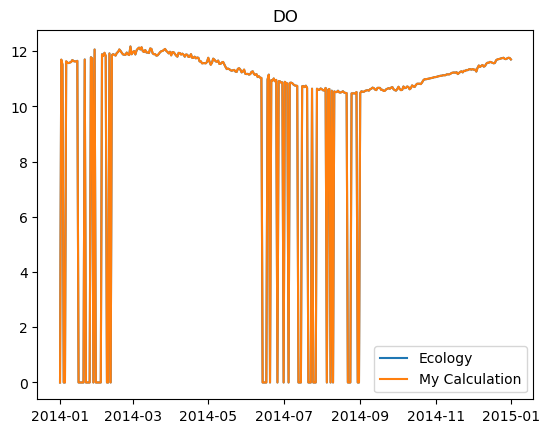

In [20]:
cush_data = dfs['data'].loc[(slice(None),13429), :]
x = [cush_data['discharge'].values / 665, apply_regressions.dates_to_year_frac(dates)]
for inputc, regc in constit_map.items():
    bs = regressions['Skokomish River'][regc]
    predict_data = apply_regressions.do_regression(x, *bs)
    if inputc not in cush_data.columns and 'l' + inputc in cush_data.columns:
        # Do a labile prediction only for simplicity
        predict_data *= lr_fractions[inputc]
        ecology_data = cush_data['l' + inputc].values
    else:
        ecology_data = cush_data[inputc].values

    fig, ax = plt.subplots()
    ax.plot(dates, ecology_data, label='Ecology')
    ax.plot(dates, predict_data, label='My Calculation')
    ax.set_title(regc)
    ax.legend()
    rel_rmse = root_mean_squared_error(ecology_data, predict_data) / ecology_data.mean()
    print(f'{regc:10s} {rel_rmse:7.3f}')

In [21]:
665 / 1.6093 ** 2

256.7719757011544

In [22]:
constit_map = {
    # Don't alter temperature, salt, tss, algn, zoon, urea, psi, dsi, talk
    'doc': 'DOC',
    'poc': 'POC',
    'nh4': 'NH4N',
    'no32': 'NO23N',
    # Phosphate is complicated
    'po4': 'OP',
    'doxg': 'DO'
    # pH to DIC is handled separately
}

for sid,group in dfs['nodes'].loc[dfs['nodes']['Source Type'] == 'River'].groupby('FVCOM ID'):
    nodes = group.index.values
    name = inflows_df.loc[sid, 'SSM2_Name']
    regname = inflows_df.loc[sid, 'WQ Regression']
    print(f'{sid}: {name}')
    if pd.isnull(regname):
        print('Skipping all regressions')
        continue
    q = newdata.loc[newdata.index.get_level_values(1).isin(nodes), 'discharge']
    assert not np.any(pd.isna(q))
    a = inflows_df.loc[sid, 'Drainage Area (mi2)'] * 1.6093 ** 2
    x = [q.groupby(level=0).sum() / a, apply_regressions.dates_to_year_frac(q.index.levels[0])]
    assert not np.any(pd.isna(x[0])), "Discharge after division and groupby contains NaNs"
    for inputc, regc in constit_map.items():
        bs, actual_regname = pick_regression(name, regname, regc)
        if np.all(pd.isnull(bs)):
            # No regression available, do not change original data
            print(f'Skipping {regc} (not available for {actual_regname})')
            continue
        p = apply_regressions.do_regression(x, *bs)
        assert not np.any(pd.isna(p)), f'{regc} from {actual_regname} contains NaNs'
        if inputc not in newdata.columns and 'l' + inputc in newdata.columns:
            # Proportion the concentrations into labile and refractory fractions
            print(f'Updating {regc} labile and refractory (using {actual_regname})')
            for n in nodes:
                newdata.loc[(slice(None),n), 'l' + inputc] = lr_fractions[inputc] * p
                newdata.loc[(slice(None),n), 'r' + inputc] = (1 - lr_fractions[inputc]) * p
        else:
            print(f'Updating {regc} (using {actual_regname})')
            for n in nodes:
                newdata.loc[(slice(None),n), inputc] = p
    # Organic N+P
    dtpn_bs, actual_regname = pick_regression(name, regname, 'DTPN')
    tpn_bs, actual_regname = pick_regression(name, regname, 'TPN')
    if np.all(pd.isnull(tpn_bs)):
        # No regressions, skip
        pass
    else:
        din = newdata.loc[(slice(None),nodes[0]), ['no32','nh4']].sum(axis=1)
        tpn = apply_regressions.do_regression(x, *tpn_bs)
        if np.all(pd.isnull(dtpn_bs)):
            # No DTPN available, so just use TPN
            org_n = tpn - din
            don = np.where(org_n < 0, 0.001, 0.5 * org_n)
            pon = np.where(org_n < 0, 0.001, 0.5 * org_n)
            print(f'Updating DON/PON labile and refractory (using TPN/OrgN)')
        else:
            # Use TPN and DTPN
            dtpn = apply_regressions.do_regression(x, *dtpn_bs)
            don = dtpn - din
            don = np.where(don < 0, 0.001, don)
            pon = tpn - dtpn
            pon = np.where(pon < 0, 0.001, pon)
            print(f'Updating DON/PON labile and refractory (using DTPN)')
        for n in nodes:
            newdata.loc[(slice(None),n), 'ldon'] = lr_fractions['don'] * don
            newdata.loc[(slice(None),n), 'rdon'] = (1 - lr_fractions['don']) * don
            newdata.loc[(slice(None),n), 'lpon'] = lr_fractions['pon'] * pon
            newdata.loc[(slice(None),n), 'rpon'] = (1 - lr_fractions['pon']) * pon
    # pH
    bs, actual_regname = pick_regression(name, regname, 'pH')
    if np.all(pd.isnull(bs)):
        print(f'Skipping pH (not available in {actual_regname})')
    else:
        p = apply_regressions.do_regression(x, *bs)
        hpl = 10 ** -p
        ohm = 10 ** (p-14)
        # Alkalinity doesn't vary by year so just use what we have already
        alk = newdata.loc[(slice(None),nodes[0]), 'talk'].to_numpy()
        # Assume alkalinity is dominated by the carbonate system
        # We could include ammonium and phosphate species but these should be rounding errors
        # Eq 5.39 and 5.40 from Benjamin
        alph1 = 1 / (hpl / ka1 + 1 + ka2 / hpl)
        alph2 = 1 / (hpl ** 2 / (ka1 * ka2) + hpl / ka2 + 1)
        # Eq 8.21b from Benjamin
        dic = ((alk + hpl - ohm) / (alph1 + alph2))
        print(f'Updating pH (using {actual_regname})')
        for n in nodes:
            newdata.loc[(slice(None),n), 'dic'] = dic

301: Agate East
Updating DOC labile and refractory (using Skookum Creek)
Updating POC labile and refractory (using Skookum Creek)
Updating NH4N (using Skookum Creek)
Updating NO23N (using Skookum Creek)
Updating OP (using Skookum Creek)
Updating DO (using Skookum Creek)
Updating DON/PON labile and refractory (using DTPN)
Updating pH (using Skookum Creek)
302: Agate West
Updating DOC labile and refractory (using Skookum Creek)
Updating POC labile and refractory (using Skookum Creek)
Updating NH4N (using Skookum Creek)
Updating NO23N (using Skookum Creek)
Updating OP (using Skookum Creek)
Updating DO (using Skookum Creek)
Updating DON/PON labile and refractory (using DTPN)
Updating pH (using Skookum Creek)
303: Anderson east
Updating DOC labile and refractory (using Woodland Creek)
Updating POC labile and refractory (using Woodland Creek)
Updating NH4N (using Woodland Creek)
Updating NO23N (using Woodland Creek)
Updating OP (using Woodland Creek)
Updating DO (using Woodland Creek)
Updati

/home/benr/mambaforge/envs/ssm-analysis/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/benr/src/ssm-analysis/input_files/apply_regressions.py:214: RuntimeWarning: invalid value encountered in matmul
  predict_log = bs0[0] + (np.array([np.log10(q), np.log10(q) ** 2,
/home/benr/mambaforge/envs/ssm-analysis/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/benr/src/ssm-analysis/input_files/apply_regressions.py:214: RuntimeWarning: invalid value encountered in matmul
  predict_log = bs0[0] + (np.array([np.log10(q), np.log10(q) ** 2,


Try scatter plots again

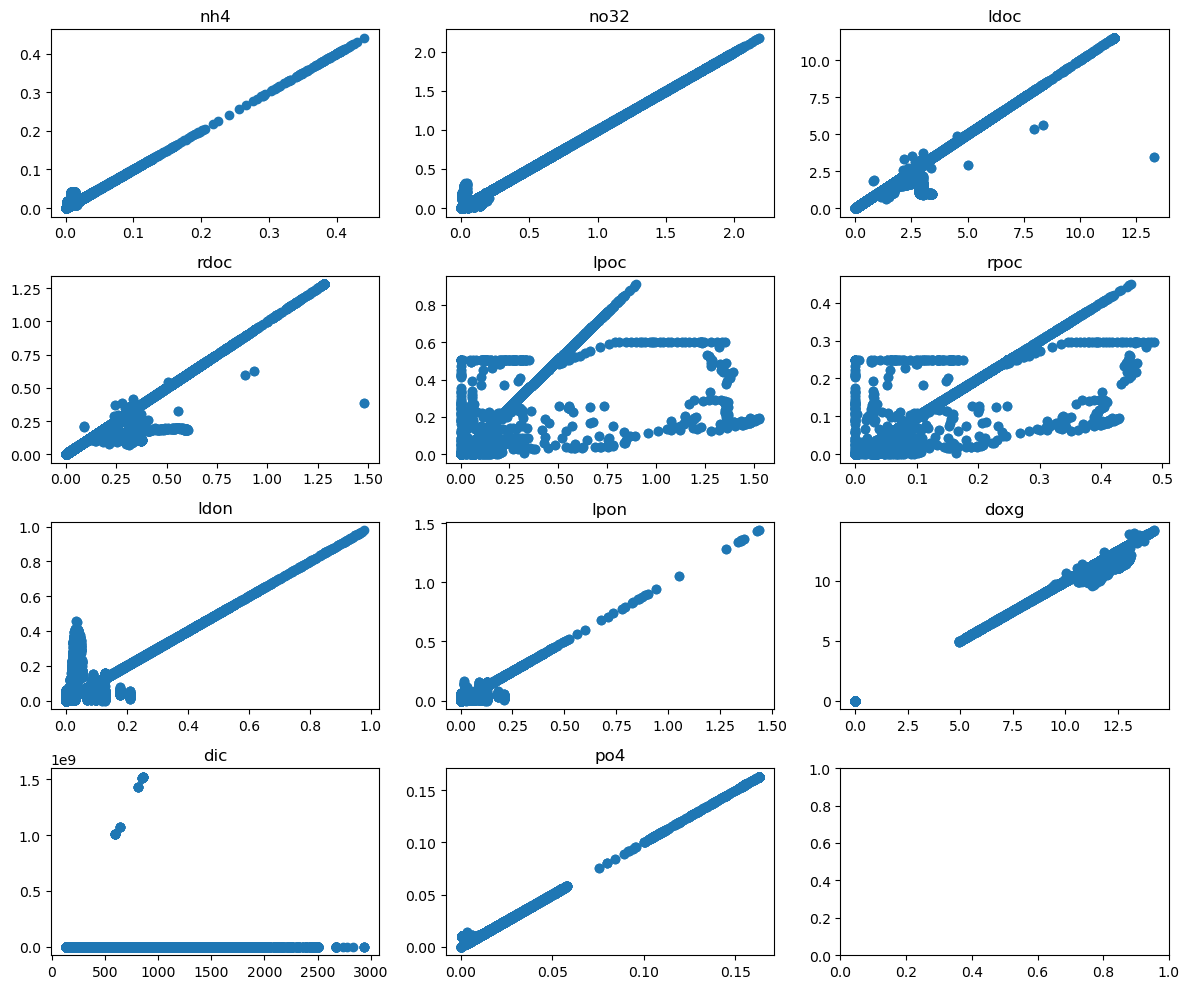

In [23]:
fig, axs = plt.subplots(4, 3, figsize=(12,10))

riv_nodes = dfs['nodes'].loc[dfs['nodes']['Source Type'] == 'River'].index
rivs_only_orig = dfs['data'].loc[np.isin(dfs['data'].index.get_level_values(1), riv_nodes)].sort_index()
rivs_only_new = newdata.loc[np.isin(newdata.index.get_level_values(1), riv_nodes)].sort_index()
for ax,constit in zip(axs.flatten(), ('nh4','no32','ldoc','rdoc','lpoc','rpoc','ldon','lpon','doxg','dic','po4',None)):
    if constit is None:
        break
    ax.scatter(rivs_only_orig[constit], rivs_only_new[constit])
    ax.set_title(constit)
fig.tight_layout()

It's an improvement, but still not great. Let's look at a single source: Agate East, which uses the Skookum regressions

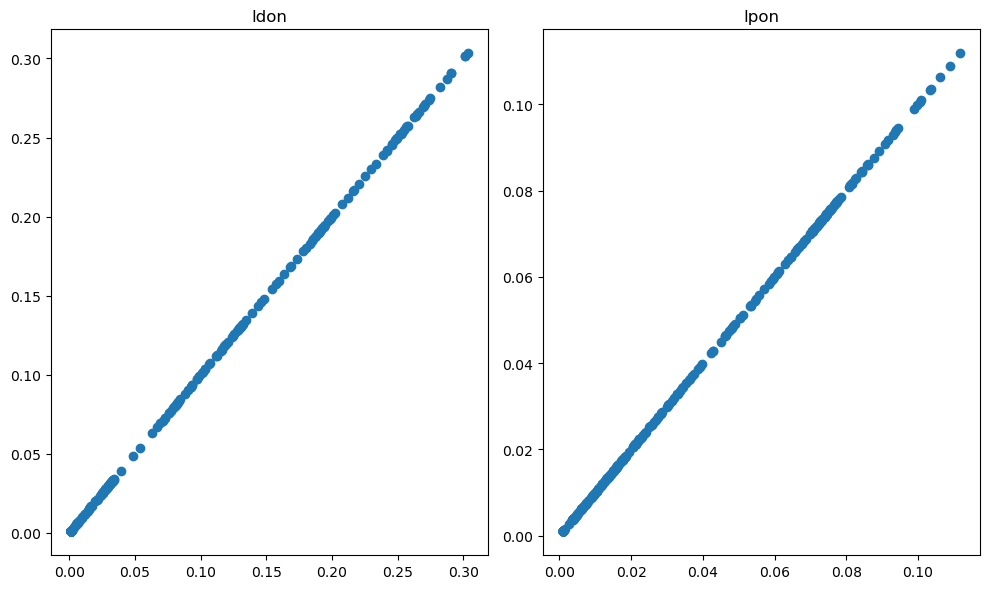

In [24]:
fig, axs = plt.subplots(1, 2, figsize=(10,6))

riv_nodes = (15634,)
rivs_only_orig = dfs['data'].loc[np.isin(dfs['data'].index.get_level_values(1), riv_nodes)].sort_index()
rivs_only_new = newdata.loc[np.isin(newdata.index.get_level_values(1), riv_nodes)].sort_index()
for ax,constit in zip(axs.flatten(), ('ldon','lpon')):
    if constit is None:
        break
    ax.scatter(rivs_only_orig[constit], rivs_only_new[constit])
    ax.set_title(constit)
fig.tight_layout()

Okay, so that one is working perfectly, and is a case where DTPN is available. Now let's check one without DTPN, Duckabush.

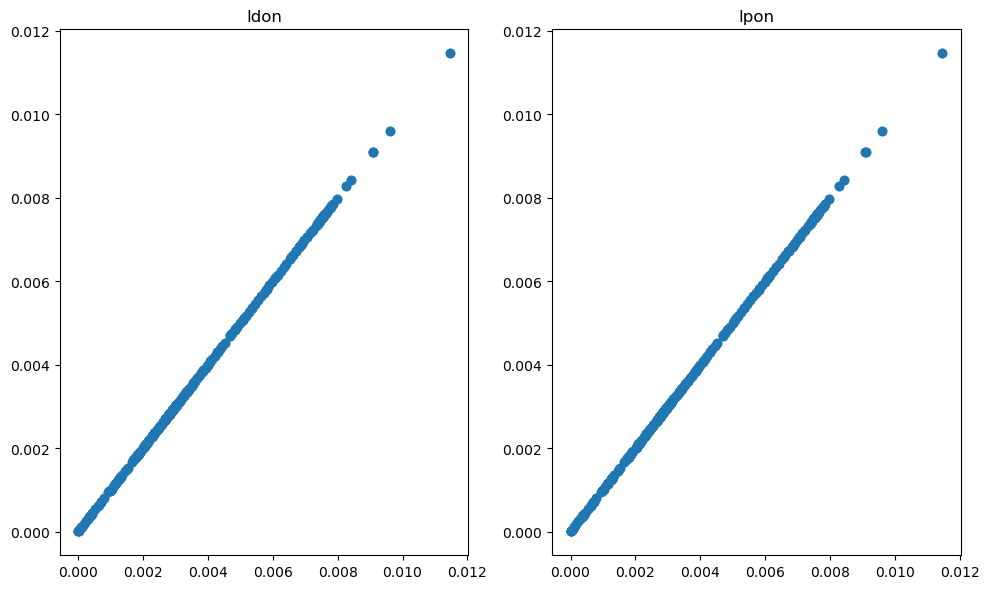

In [25]:
fig, axs = plt.subplots(1, 2, figsize=(10,6))

riv_nodes = (11591,11592)
rivs_only_orig = dfs['data'].loc[np.isin(dfs['data'].index.get_level_values(1), riv_nodes)].sort_index()
rivs_only_new = newdata.loc[np.isin(newdata.index.get_level_values(1), riv_nodes)].sort_index()
for ax,constit in zip(axs.flatten(), ('ldon','lpon')):
    if constit is None:
        break
    ax.scatter(rivs_only_orig[constit], rivs_only_new[constit])
    ax.set_title(constit)
fig.tight_layout()

Both cases appear to be working correctly at least some of the time, so let's examine which sources are having fit problems.

In [26]:
resids = (newdata['ldon'] - dfs['data']['ldon'])
resids.loc[np.abs(resids) > newdata['ldon'] * 0.1].index.get_level_values(1).drop_duplicates()

Index([15187, 15188, 14705, 15971, 15916, 13873, 13874, 14096, 14097, 12162,
       10991, 10992, 13396, 11970, 13268, 12872, 12873,  8554],
      dtype='int64', name='Node')

Failing nodes correspond to:
 * 15187 and 15188: Nisqually River (same regression, method 2)
 * 14705: Rosedale (Burley Creek regression, method 1)
 * 15971: Skookum Creek (same regression, method 1)
 * 15916: Snodgrass Creek (Kennedy Creek regression, method 1)
 * 13873 and 13874: Puyallup River (same regression, method 2)
 * 14096 and 14097: Green River (same regression, method 2)
 * 12162: Ellisport (Burley Creek regression, method 1)
 * 10991 and 10992 are Lake Washington (already discussed earlier)
 * 13396: Magnolia Beach (Burley Creek regression, method 1)
 * 11970: Miller Creek (Chambers regression, method 1)
 * 13268: Tahlequah (Burley Creek regression, method 1)
 * 12872 and 12873: Hamma Hamma (Skokomish regression, method 3)
 * 8554: NW Hood (Big Beef regression, method 3)

Let's plot one node from each river to quickly eliminate the ones that look okay.

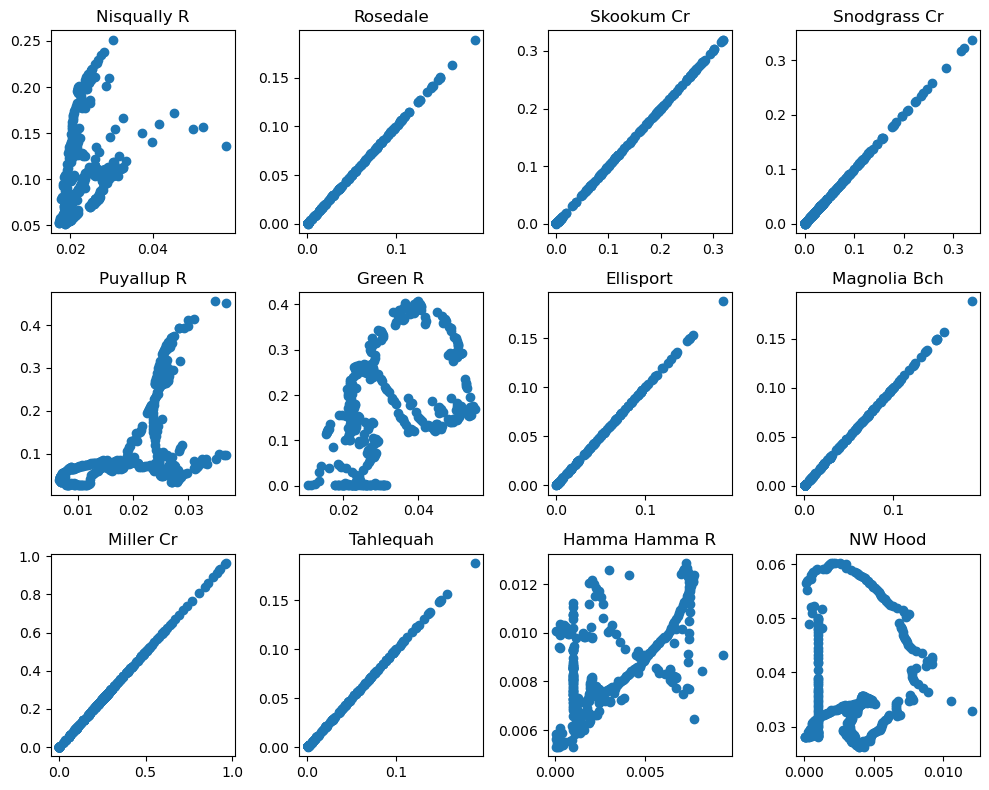

In [27]:
suspect_nodes = (15187, 14705, 15971, 15916, 13873, 14096, 12162, 13396, 11970, 13268, 12872, 8554)

fig, axs = plt.subplots(3, 4, figsize=(10, 8))
for n,ax in zip(suspect_nodes, axs.flatten()):
    onesrc_orig = dfs['data'].xs(n, level=1)
    onesrc_new = newdata.xs(n, level=1)
    ax.scatter(onesrc_orig['ldon'],
           onesrc_new['ldon'])
    ax.set_title(dfs['nodes'].loc[n, 'Name'])
fig.tight_layout()

Okay, so it's really just Nisqually, Green, Puyallup, Hamma Hamma, and NW Hood that have problems.

Nisqually, Puyallup, and Green all use their own regressions and are unique to themselves.

Nisqually is listed as using OrgN regression method 2 (DTP, no DTPN) but the above code chose to use DTPN because DTPN regression coefficients are in the data file! So we can't rely solely on the presence/absence of a regression to decide which one to use.

It looks like this is also the problem for all the other problematic rivers above: coefficients are included on the regression that are not supposed to be used, at least not for that particular river.

In [28]:
for sid,group in dfs['nodes'].loc[dfs['nodes']['Source Type'] == 'River'].groupby('FVCOM ID'):
    nodes = group.index.values
    name = inflows_df.loc[sid, 'SSM2_Name']
    regname = inflows_df.loc[sid, 'WQ Regression']
    print(f'{sid}: {name}')
    if pd.isnull(regname):
        print('Skipping all regressions')
        continue
    q = newdata.loc[newdata.index.get_level_values(1).isin(nodes), 'discharge']
    assert not np.any(pd.isna(q))
    a = inflows_df.loc[sid, 'Drainage Area (mi2)'] * 1.6093 ** 2
    x = [q.groupby(level=0).sum() / a, apply_regressions.dates_to_year_frac(q.index.levels[0])]
    assert not np.any(pd.isna(x[0])), "Discharge after division and groupby contains NaNs"
    for inputc, regc in constit_map.items():
        bs, actual_regname = pick_regression(name, regname, regc)
        if np.all(pd.isnull(bs)):
            # No regression available, do not change original data
            print(f'Skipping {regc} (not available for {actual_regname})')
            continue
        p = apply_regressions.do_regression(x, *bs)
        assert not np.any(pd.isna(p)), f'{regc} from {actual_regname} contains NaNs'
        if inputc not in newdata.columns and 'l' + inputc in newdata.columns:
            # Proportion the concentrations into labile and refractory fractions
            print(f'Updating {regc} labile and refractory (using {actual_regname})')
            for n in nodes:
                newdata.loc[(slice(None),n), 'l' + inputc] = lr_fractions[inputc] * p
                newdata.loc[(slice(None),n), 'r' + inputc] = (1 - lr_fractions[inputc]) * p
        else:
            print(f'Updating {regc} (using {actual_regname})')
            for n in nodes:
                newdata.loc[(slice(None),n), inputc] = p
    # Organic N+P
    regmethod = int(inflows_df.loc[sid, 'WQ Regression Method'][0])
    dtpn_bs, actual_regname = pick_regression(name, regname, 'DTPN')
    tpn_bs, actual_regname = pick_regression(name, regname, 'TPN')
    if regmethod in (1, 2):
        din = newdata.loc[(slice(None),nodes[0]), ['no32','nh4']].sum(axis=1)
        tpn = apply_regressions.do_regression(x, *tpn_bs)
        if regmethod == 1: # DTPN and DTP
            dtpn = apply_regressions.do_regression(x, *dtpn_bs)
            don = dtpn - din
            don = np.where(don < 0, 0.001, don)
            pon = tpn - dtpn
            pon = np.where(pon < 0, 0.001, pon)
            print(f'Updating DON/PON labile and refractory (using DTPN)')
        else: # DTP only
            org_n = tpn - din
            don = np.where(org_n < 0, 0.001, 0.5 * org_n)
            pon = np.where(org_n < 0, 0.001, 0.5 * org_n)
            print(f'Updating DON/PON labile and refractory (using TPN/OrgN)')

        for n in nodes:
            newdata.loc[(slice(None),n), 'ldon'] = lr_fractions['don'] * don
            newdata.loc[(slice(None),n), 'rdon'] = (1 - lr_fractions['don']) * don
            newdata.loc[(slice(None),n), 'lpon'] = lr_fractions['pon'] * pon
            newdata.loc[(slice(None),n), 'rpon'] = (1 - lr_fractions['pon']) * pon
    # pH
    bs, actual_regname = pick_regression(name, regname, 'pH')
    if np.all(pd.isnull(bs)):
        print(f'Skipping pH (not available in {actual_regname})')
    else:
        p = apply_regressions.do_regression(x, *bs)
        # [H+] and [OH-] concentrations
        hpl = 10 ** -p
        ohm = 10 ** (p-14)
        # Alkalinity doesn't vary by year so just use what we have already
        alk = newdata.loc[(slice(None),nodes[0]), 'talk'].to_numpy()
        # Assume alkalinity is dominated by the carbonate system
        # We could include ammonium and phosphate species but these should be rounding errors
        # Eq 5.39 and 5.40 from Benjamin
        alph1 = 1 / (hpl / ka1 + 1 + ka2 / hpl)
        alph2 = 1 / (hpl ** 2 / (ka1 * ka2) + hpl / ka2 + 1)
        # Eq 8.21b from Benjamin
        dic = ((alk + hpl - ohm) / (alph1 + alph2))
        print(f'Updating pH (using {actual_regname})')
        for n in nodes:
            newdata.loc[(slice(None),n), 'dic'] = dic

301: Agate East
Updating DOC labile and refractory (using Skookum Creek)
Updating POC labile and refractory (using Skookum Creek)
Updating NH4N (using Skookum Creek)
Updating NO23N (using Skookum Creek)
Updating OP (using Skookum Creek)
Updating DO (using Skookum Creek)
Updating DON/PON labile and refractory (using DTPN)
Updating pH (using Skookum Creek)
302: Agate West
Updating DOC labile and refractory (using Skookum Creek)
Updating POC labile and refractory (using Skookum Creek)
Updating NH4N (using Skookum Creek)
Updating NO23N (using Skookum Creek)
Updating OP (using Skookum Creek)
Updating DO (using Skookum Creek)
Updating DON/PON labile and refractory (using DTPN)
Updating pH (using Skookum Creek)
303: Anderson east
Updating DOC labile and refractory (using Woodland Creek)
Updating POC labile and refractory (using Woodland Creek)
Updating NH4N (using Woodland Creek)
Updating NO23N (using Woodland Creek)
Updating OP (using Woodland Creek)
Updating DO (using Woodland Creek)
Updati

/home/benr/mambaforge/envs/ssm-analysis/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/benr/src/ssm-analysis/input_files/apply_regressions.py:214: RuntimeWarning: invalid value encountered in matmul
  predict_log = bs0[0] + (np.array([np.log10(q), np.log10(q) ** 2,


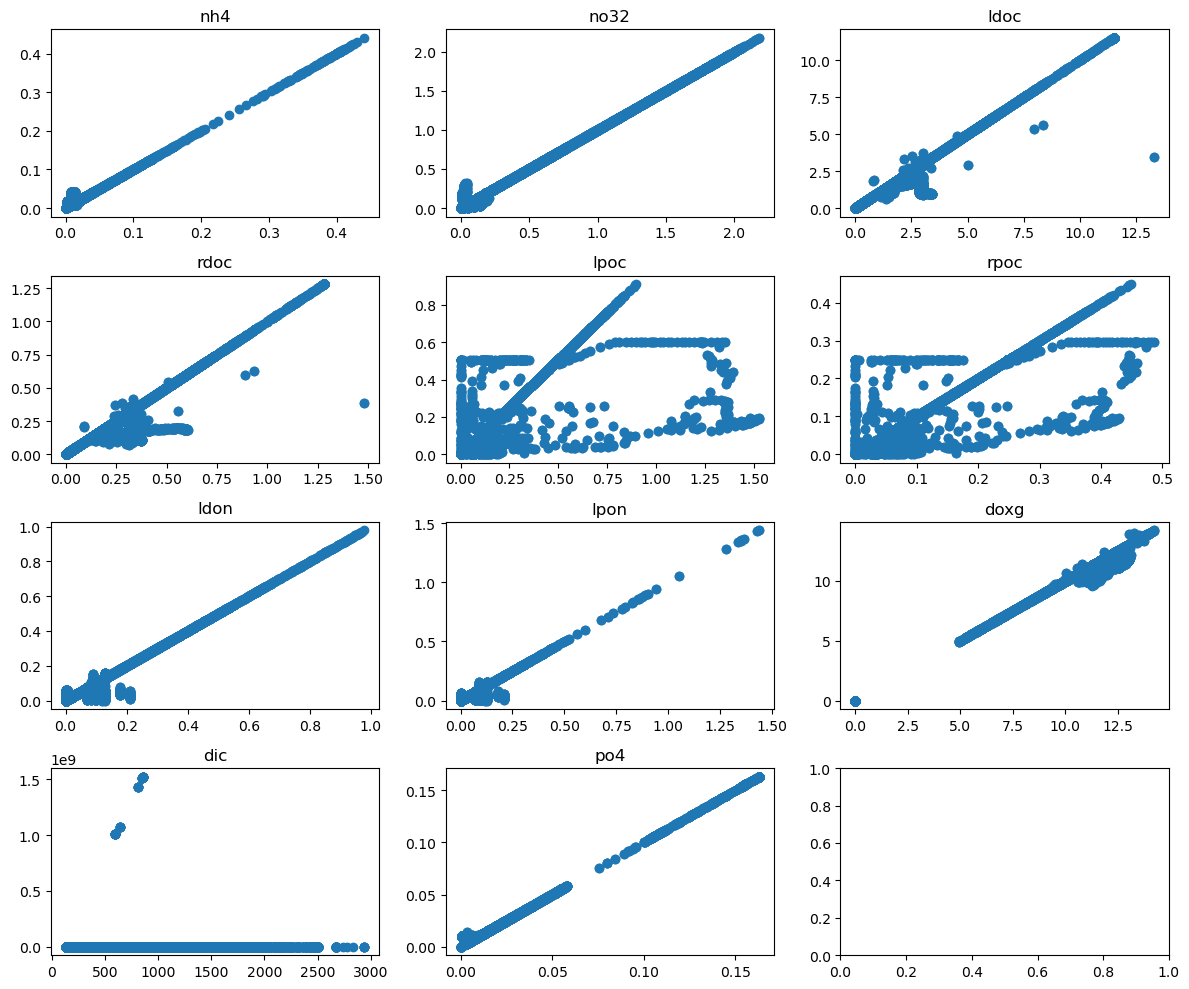

In [29]:
fig, axs = plt.subplots(4, 3, figsize=(12,10))

riv_nodes = dfs['nodes'].loc[dfs['nodes']['Source Type'] == 'River'].index
rivs_only_orig = dfs['data'].loc[np.isin(dfs['data'].index.get_level_values(1), riv_nodes)].sort_index()
rivs_only_new = newdata.loc[np.isin(newdata.index.get_level_values(1), riv_nodes)].sort_index()
for ax,constit in zip(axs.flatten(), ('nh4','no32','ldoc','rdoc','lpoc','rpoc','ldon','lpon','doxg','dic','po4',None)):
    if constit is None:
        break
    ax.scatter(rivs_only_orig[constit], rivs_only_new[constit])
    ax.set_title(constit)
fig.tight_layout()

This is much better. Now repeat the check without the lakes.

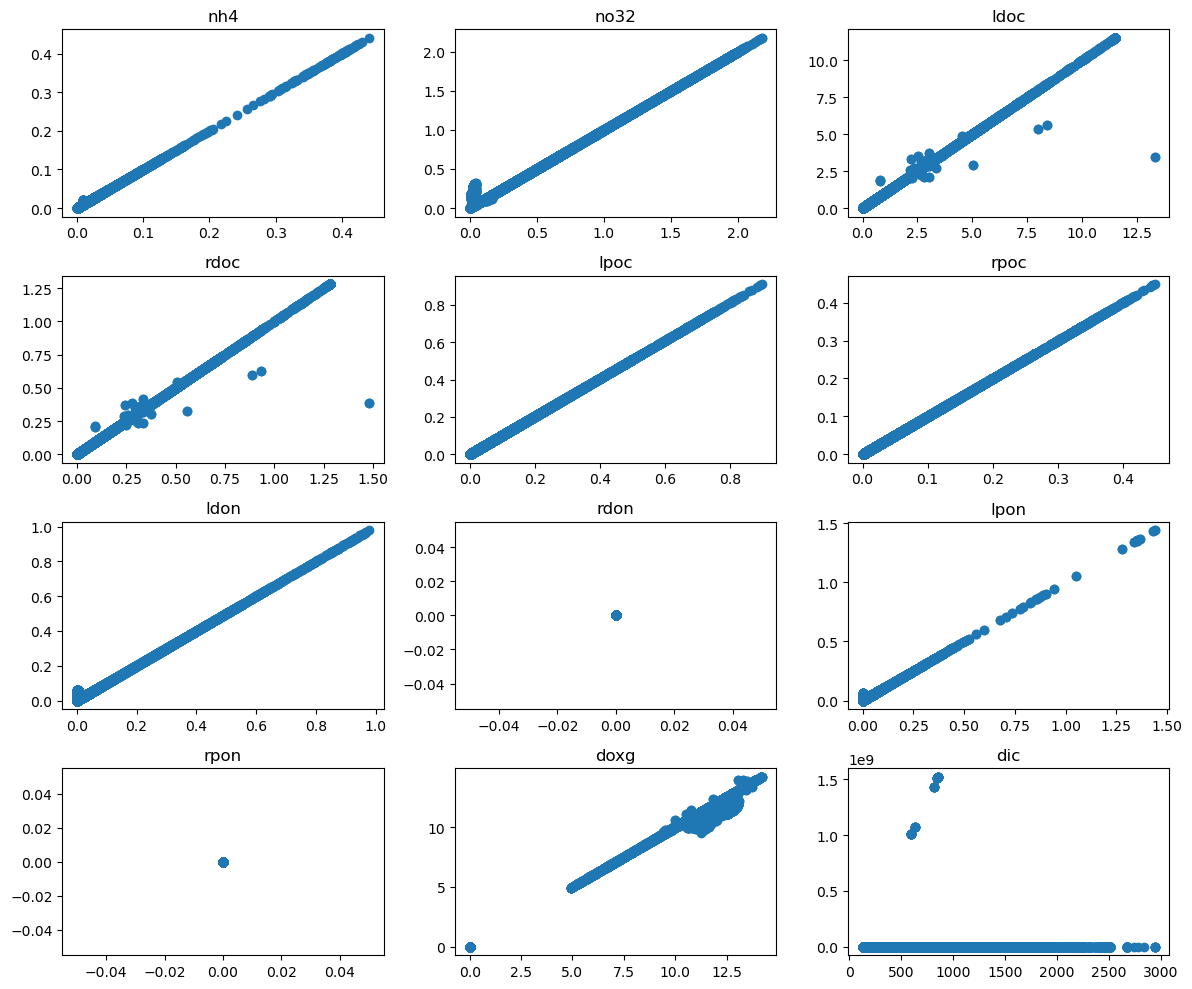

In [30]:
fig, axs = plt.subplots(4, 3, figsize=(12,10))

riv_nodes = dfs['nodes'].loc[(dfs['nodes']['Source Type'] == 'River') & ~np.isin(dfs['nodes'].index, (15856,15873,10991,10992))].index
rivs_only_orig = dfs['data'].loc[np.isin(dfs['data'].index.get_level_values(1), riv_nodes)].sort_index()
rivs_only_new = newdata.loc[np.isin(newdata.index.get_level_values(1), riv_nodes)].sort_index()
for ax,constit in zip(axs.flatten(), ('nh4','no32','ldoc','rdoc','lpoc','rpoc','ldon','rdon','lpon','rpon','doxg','dic')):
    ax.scatter(rivs_only_orig[constit], rivs_only_new[constit])
    ax.set_title(constit)
fig.tight_layout()

We're really close! Now it's time to comprehensively go through all of the handful of significant deviations and ensure we can explain why they're different.

In [31]:
resids = (newdata['nh4'] - dfs['data']['nh4'])
suspect_nodes = resids.loc[np.abs(resids) > newdata['nh4'] * 0.1].index.get_level_values(1).drop_duplicates()
suspect_nodes

Index([14801, 14702, 14657, 14821, 14615, 10991, 10992, 12872, 12873, 8554], dtype='int64', name='Node')

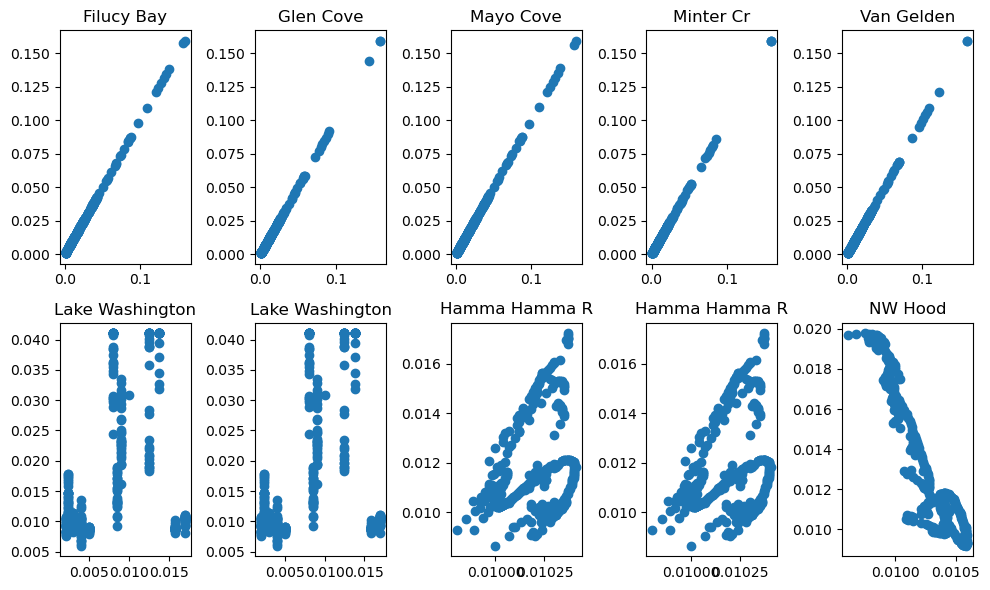

In [32]:
fig, axs = plt.subplots(2, 5, figsize=(10, 6))
for n,ax in zip(suspect_nodes, axs.flatten()):
    onesrc_orig = dfs['data'].xs(n, level=1)
    onesrc_new = newdata.xs(n, level=1)
    ax.scatter(onesrc_orig['nh4'],
           onesrc_new['nh4'])
    ax.set_title(dfs['nodes'].loc[n, 'Name'])
fig.tight_layout()

So we're still having problems with Hamma Hamma and NW Hood. I wonder why...

Both of these are treated as special cases in `pick_regression` because Ecology's spreadsheet says they use Duckabush River for DOC and POC only. Let's start by checking DOC/POC agreement.

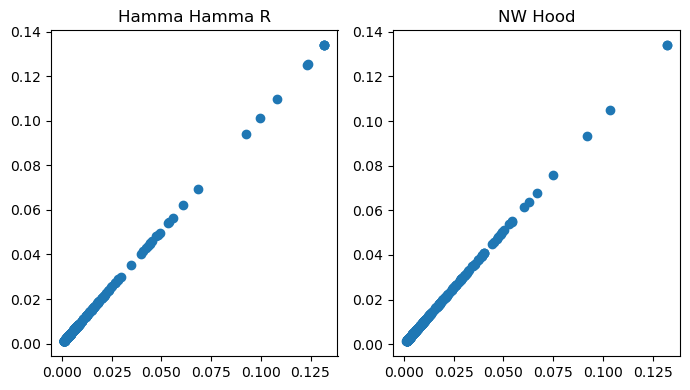

In [33]:
hamma_nwhood = (12872, 8554)

fig, axs = plt.subplots(1, 2, figsize=(7, 4))
for n,ax in zip(hamma_nwhood, axs):
    onesrc_orig = dfs['data'].xs(n, level=1)
    onesrc_new = newdata.xs(n, level=1)
    ax.scatter(onesrc_orig['lpoc'],
           onesrc_new['lpoc'])
    ax.set_title(dfs['nodes'].loc[n, 'Name'])
fig.tight_layout()

Okay, they're perfect. So we know they are indeed using Duckabush for that data. Let's try every available regression for nh4 with the Hamma Hamma River and see if one of them fits.

In [34]:
nodes = [12872, 12873]
sid = 403
q = newdata.loc[newdata.index.get_level_values(1).isin(nodes), 'discharge']
a = inflows_df.loc[sid, 'Drainage Area (mi2)'] * 1.6093 ** 2
x = [q.groupby(level=0).sum() / a, apply_regressions.dates_to_year_frac(q.index.levels[0])]
orig = dfs['data'].xs(nodes[0], level=1)
for regname, data in regressions.items():
    bs = data['NH4N']
    p = apply_regressions.do_regression(x, *bs)
    # Compute RMSE as a fraction of the mean original values. Mark results where RMSE is less than 1% of the mean
    pct_rmse = root_mean_squared_error(orig['nh4'], p) / orig['nh4'].mean()
    print(f"{regname:30s}{pct_rmse:7.4f}{' <----' if pct_rmse < 0.01 else ''}")

Big Beef Creek                 0.3982
Burley Creek                   1.4229
Chambers Creek                 0.9210
Coulter Creek                  0.5563
Deschutes River                0.2417
Duckabush River                0.0003 <----
Elwha River                    1.1105
Goldsborough Creek             0.0239
Green River                    1.7505
Kennedy Creek                  2.0568
Lake Washington                1.1854
McAllister Creek               4.1758
McLane Creek                   4.4158
Minter Creek                   2.8205
Nisqually River                0.1379
Nooksack River                 1.3267
Perry Creek                    3.5010
Puyallup River                 1.2123
Rocky Creek                    0.3361
Samish River                   0.4005
Sherwood Creek                 0.4117
Sinclair/Dyes Inlet            0.4749
Skagit River                   0.1021
Skokomish River                0.2445
Skookum Creek                  1.5085
Snohomish River                0.4230
Stilla

So it looks like Hamma Hamma is using Duckabush for NH4 as well! Let's also check NW Hood.

In [35]:
nodes = [8554]
sid = 406
q = newdata.loc[newdata.index.get_level_values(1).isin(nodes), 'discharge']
a = inflows_df.loc[sid, 'Drainage Area (mi2)'] * 1.6093 ** 2
x = [q.groupby(level=0).sum() / a, apply_regressions.dates_to_year_frac(q.index.levels[0])]
orig = dfs['data'].xs(nodes[0], level=1)
for regname, data in regressions.items():
    bs = data['NH4N']
    p = apply_regressions.do_regression(x, *bs)
    # Compute RMSE as a fraction of the mean original values. Mark results where RMSE is less than 1% of the mean
    pct_rmse = root_mean_squared_error(orig['nh4'], p) / orig['nh4'].mean()
    print(f"{regname:30s}{pct_rmse:7.4f}{' <----' if pct_rmse < 0.01 else ''}")

Big Beef Creek                 0.4104
Burley Creek                   1.5960
Chambers Creek                 0.7928
Coulter Creek                  2.2632
Deschutes River                1.0970
Duckabush River                0.0003 <----
Elwha River                    0.8789
Goldsborough Creek             0.0358
Green River                   15.1546
Kennedy Creek                  3.4523
Lake Washington                1.4391
McAllister Creek               5.0223
McLane Creek                   4.4842
Minter Creek                   8.6582
Nisqually River                0.3244
Nooksack River                 1.6499
Perry Creek                    2.9500
Puyallup River                 5.1896
Rocky Creek                    0.3937
Samish River                   0.5641
Sherwood Creek                 0.7066
Sinclair/Dyes Inlet            0.6491
Skagit River                   0.1194
Skokomish River                0.3530
Skookum Creek                  1.1318
Snohomish River                0.4589
Stilla

Yep, also Duckabush.

Now I need to figure out if Duckabush is the regression being used for *all* regressions on these sources. Start with NW Hood because the variables are already set up.

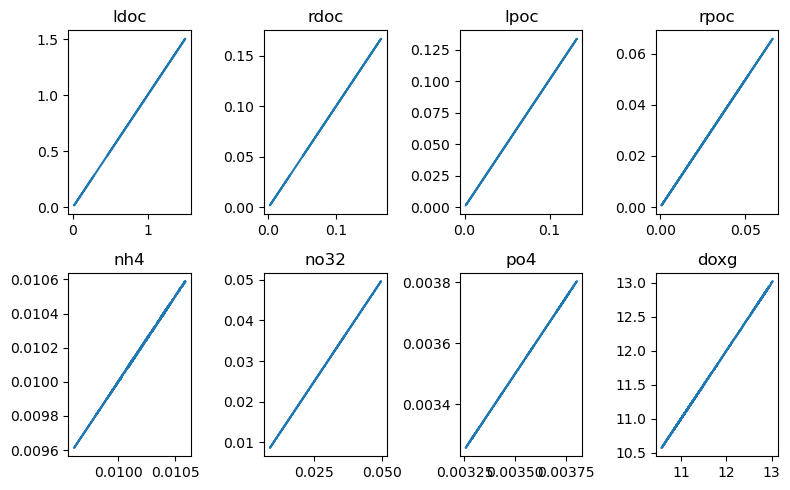

In [36]:
nwhood_allduck = {}
for inputc, regc in constit_map.items():
    bs = regressions['Duckabush River'][regc]
    if np.all(pd.isnull(bs)):
        # No regression available, do not change original data
        print(f'Skipping {regc} (not available for Duckabush)')
        continue
    p = apply_regressions.do_regression(x, *bs)
    if inputc not in newdata.columns and 'l' + inputc in newdata.columns:
        # Proportion the concentrations into labile and refractory fractions
        for n in nodes:
            nwhood_allduck['l' + inputc] = lr_fractions[inputc] * p
            nwhood_allduck['r' + inputc] = (1 - lr_fractions[inputc]) * p
    else:
        nwhood_allduck[inputc] = p

fig, axs = plt.subplots(2, 4, figsize=(8, 5))
for (inputc, p),ax in zip(nwhood_allduck.items(), axs.flatten()):
    ax.plot(orig[inputc], p)
    ax.set_title(inputc)
fig.tight_layout()

Yes, the Duckabush regressions match NW Hood data exactly for all constituents. Now retry for Hamma Hamma just to be certain.

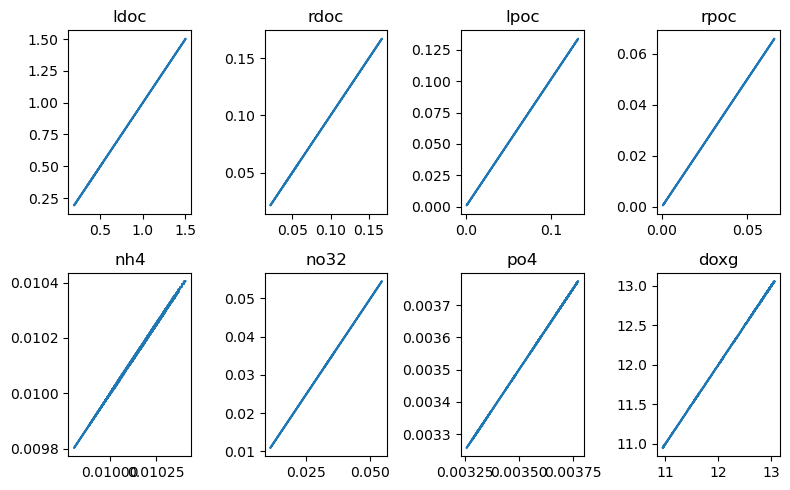

In [37]:
nodes = [12872, 12873]
sid = 403
q = newdata.loc[newdata.index.get_level_values(1).isin(nodes), 'discharge']
a = inflows_df.loc[sid, 'Drainage Area (mi2)'] * 1.6093 ** 2
x = [q.groupby(level=0).sum() / a, apply_regressions.dates_to_year_frac(q.index.levels[0])]
orig = dfs['data'].xs(nodes[0], level=1)

hamma_allduck = {}
for inputc, regc in constit_map.items():
    bs = regressions['Duckabush River'][regc]
    if np.all(pd.isnull(bs)):
        # No regression available, do not change original data
        print(f'Skipping {regc} (not available for Duckabush)')
        continue
    p = apply_regressions.do_regression(x, *bs)
    if inputc not in newdata.columns and 'l' + inputc in newdata.columns:
        # Proportion the concentrations into labile and refractory fractions
        for n in nodes:
            hamma_allduck['l' + inputc] = lr_fractions[inputc] * p
            hamma_allduck['r' + inputc] = (1 - lr_fractions[inputc]) * p
    else:
        hamma_allduck[inputc] = p

fig, axs = plt.subplots(2, 4, figsize=(8, 5))
for (inputc, p),ax in zip(hamma_allduck.items(), axs.flatten()):
    ax.plot(orig[inputc], p)
    ax.set_title(inputc)
fig.tight_layout()

Perfect again. So all we need to do to fix this is modify the `pick_regression` hardcoding for these two rivers.

In [38]:
newdata = dfs['data'].copy()

def pick_regression(name, regname, regc):
    if regname in regressions:
        return regressions[regname][regc], regname
    # Sloppiness in spreadsheet
    if name in regressions:
        return regressions[name][regc], name
    if name in ('Kitsap NE', 'Kitsap_Hood', 'Port Gamble'):
        #actual_regname = 'Sinclair/Dyes Inlet' if regc in ('DOC','POC') else 'Big Beef Creek'
        actual_regname = 'Big Beef Creek'
    elif name == 'Hamma Hamma R':
        actual_regname = 'Duckabush River'
    elif name == 'NW Hood':
        actual_regname = 'Duckabush River'
    elif name == 'Skokomish R':
        #actual_regname = 'Skookum Creek' if regc in ('POC') else 'Skokomish River'
        actual_regname = 'Skokomish River'
    else:
        # TODO raise a ValueError
        print(f'{name} {regname} {regc}')
        return None, None
    return regressions[actual_regname][regc], actual_regname

for sid,group in dfs['nodes'].loc[dfs['nodes']['Source Type'] == 'River'].groupby('FVCOM ID'):
    nodes = group.index.values
    name = inflows_df.loc[sid, 'SSM2_Name']
    regname = inflows_df.loc[sid, 'WQ Regression']
    print(f'{sid}: {name} (nodes {", ".join(nodes.astype(str))})')
    if pd.isnull(regname):
        print('Skipping all regressions')
        continue
    q = newdata.loc[newdata.index.get_level_values(1).isin(nodes), 'discharge']
    assert not np.any(pd.isna(q))
    a = inflows_df.loc[sid, 'Drainage Area (mi2)'] * 1.6093 ** 2
    x = [q.groupby(level=0).sum() / a, apply_regressions.dates_to_year_frac(q.index.levels[0])]
    assert not np.any(pd.isna(x[0])), "Discharge after division and groupby contains NaNs"
    for inputc, regc in constit_map.items():
        bs, actual_regname = pick_regression(name, regname, regc)
        if np.all(pd.isnull(bs)):
            # No regression available, do not change original data
            print(f'Skipping {regc} (not available for {actual_regname})')
            continue
        p = apply_regressions.do_regression(x, *bs)
        assert not np.any(pd.isna(p)), f'{regc} from {actual_regname} contains NaNs'
        if inputc not in newdata.columns and 'l' + inputc in newdata.columns:
            # Proportion the concentrations into labile and refractory fractions
            print(f'Updating {regc} labile and refractory (using {actual_regname})')
            for n in nodes:
                newdata.loc[(slice(None),n), 'l' + inputc] = lr_fractions[inputc] * p
                newdata.loc[(slice(None),n), 'r' + inputc] = (1 - lr_fractions[inputc]) * p
        else:
            print(f'Updating {regc} (using {actual_regname})')
            for n in nodes:
                newdata.loc[(slice(None),n), inputc] = p
    # Organic N+P
    regmethod = int(inflows_df.loc[sid, 'WQ Regression Method'][0])
    dtpn_bs, actual_regname = pick_regression(name, regname, 'DTPN')
    tpn_bs, actual_regname = pick_regression(name, regname, 'TPN')
    if regmethod in (1, 2):
        din = newdata.loc[(slice(None),nodes[0]), ['no32','nh4']].sum(axis=1)
        tpn = apply_regressions.do_regression(x, *tpn_bs)
        if regmethod == 1: # DTPN and DTP
            dtpn = apply_regressions.do_regression(x, *dtpn_bs)
            don = dtpn - din
            don = np.where(don < 0, 0.001, don)
            pon = tpn - dtpn
            pon = np.where(pon < 0, 0.001, pon)
            print(f'Updating DON/PON labile and refractory (using DTPN)')
        else: # DTP only
            org_n = tpn - din
            don = np.where(org_n < 0, 0.001, 0.5 * org_n)
            pon = np.where(org_n < 0, 0.001, 0.5 * org_n)
            print(f'Updating DON/PON labile and refractory (using TPN/OrgN)')

        for n in nodes:
            newdata.loc[(slice(None),n), 'ldon'] = lr_fractions['don'] * don
            newdata.loc[(slice(None),n), 'rdon'] = (1 - lr_fractions['don']) * don
            newdata.loc[(slice(None),n), 'lpon'] = lr_fractions['pon'] * pon
            newdata.loc[(slice(None),n), 'rpon'] = (1 - lr_fractions['pon']) * pon
    # pH
    bs, actual_regname = pick_regression(name, regname, 'pH')
    if np.all(pd.isnull(bs)):
        print(f'Skipping pH (not available in {actual_regname})')
    else:
        p = apply_regressions.do_regression(x, *bs)
        # [H+] and [OH-] concentrations
        hpl = 10 ** -p
        ohm = 10 ** (p-14)
        # Alkalinity doesn't vary by year so just use what we have already
        alk = newdata.loc[(slice(None),nodes[0]), 'talk'].to_numpy()
        # Assume alkalinity is dominated by the carbonate system
        # We could include ammonium and phosphate species but these should be rounding errors
        # Eq 5.39 and 5.40 from Benjamin
        alph1 = 1 / (hpl / ka1 + 1 + ka2 / hpl)
        alph2 = 1 / (hpl ** 2 / (ka1 * ka2) + hpl / ka2 + 1)
        # Eq 8.21b from Benjamin
        dic = ((alk + hpl - ohm) / (alph1 + alph2))
        print(f'Updating pH (using {actual_regname})')
        if sid == 427:
            print(nodes)
            print(dic)
        for n in nodes:
            newdata.loc[(slice(None),n), 'dic'] = dic

301: Agate East (nodes 15634)
Updating DOC labile and refractory (using Skookum Creek)
Updating POC labile and refractory (using Skookum Creek)
Updating NH4N (using Skookum Creek)
Updating NO23N (using Skookum Creek)
Updating OP (using Skookum Creek)
Updating DO (using Skookum Creek)
Updating DON/PON labile and refractory (using DTPN)
Updating pH (using Skookum Creek)
302: Agate West (nodes 15936)
Updating DOC labile and refractory (using Skookum Creek)
Updating POC labile and refractory (using Skookum Creek)
Updating NH4N (using Skookum Creek)
Updating NO23N (using Skookum Creek)
Updating OP (using Skookum Creek)
Updating DO (using Skookum Creek)
Updating DON/PON labile and refractory (using DTPN)
Updating pH (using Skookum Creek)
303: Anderson east (nodes 14437)
Updating DOC labile and refractory (using Woodland Creek)
Updating POC labile and refractory (using Woodland Creek)
Updating NH4N (using Woodland Creek)
Updating NO23N (using Woodland Creek)
Updating OP (using Woodland Creek)

/home/benr/mambaforge/envs/ssm-analysis/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/benr/src/ssm-analysis/input_files/apply_regressions.py:214: RuntimeWarning: invalid value encountered in matmul
  predict_log = bs0[0] + (np.array([np.log10(q), np.log10(q) ** 2,


Recheck fits ignoring the lakes.

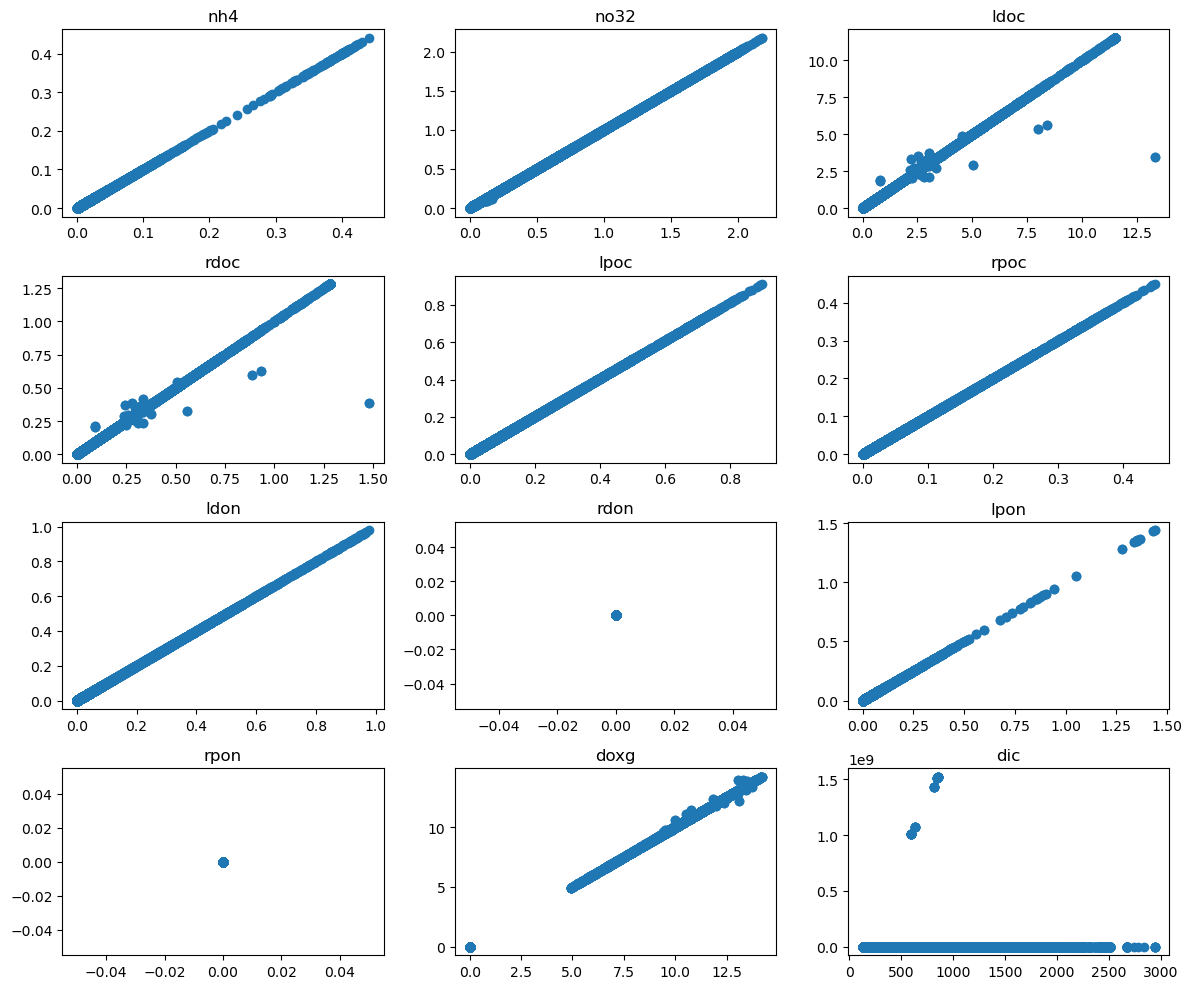

In [39]:
fig, axs = plt.subplots(4, 3, figsize=(12,10))

riv_nodes = dfs['nodes'].loc[(dfs['nodes']['Source Type'] == 'River') & ~np.isin(dfs['nodes'].index, (15856,15873,10991,10992))].index
rivs_only_orig = dfs['data'].loc[np.isin(dfs['data'].index.get_level_values(1), riv_nodes)].sort_index()
rivs_only_new = newdata.loc[np.isin(newdata.index.get_level_values(1), riv_nodes)].sort_index()
for ax,constit in zip(axs.flatten(), ('nh4','no32','ldoc','rdoc','lpoc','rpoc','ldon','rdon','lpon','rpon','doxg','dic')):
    ax.scatter(rivs_only_orig[constit], rivs_only_new[constit])
    ax.set_title(constit)
fig.tight_layout()

All that's outstanding is some disagreement in DOC and DIC.

Let's start with DIC. Our calculations aren't very accurate so my typical approach of looking at maximum relative residual will flag too many results. I just want the worst offenders, so use relative RMSE.

In [40]:
dic_comp = pd.DataFrame({'new': newdata['dic'], 'orig': dfs['data']['dic']}, index=newdata.index)
rmses = []
for n,group in dic_comp.groupby(dic_comp.index.get_level_values(1)):
    if np.any(pd.isna(group['orig'])):
        rmses.append(np.nan)
    else:
        rmses.append(root_mean_squared_error(group['new'], group['orig']) / group['orig'].mean())

rmses_df = pd.DataFrame({'rmse': rmses}, index=dic_comp.index.levels[1])
#resids = (newdata['dic'] - dfs['data']['dic'])
#suspect_nodes = resids.loc[np.abs(resids) > newdata['dic'] * 0.1].index.get_level_values(1).drop_duplicates()
#suspect_nodes
suspect_nodes = rmses_df.loc[rmses_df['rmse'] > 0.1].index
rmses_df.loc[rmses_df['rmse'] > 0.1]

rmse
Node                
8610        0.139094
13429  721884.633667
15155       0.449813
15165       8.406437
15166       8.406437
15330       0.487811
15468       0.478248
15717       0.491317
15754       0.522631

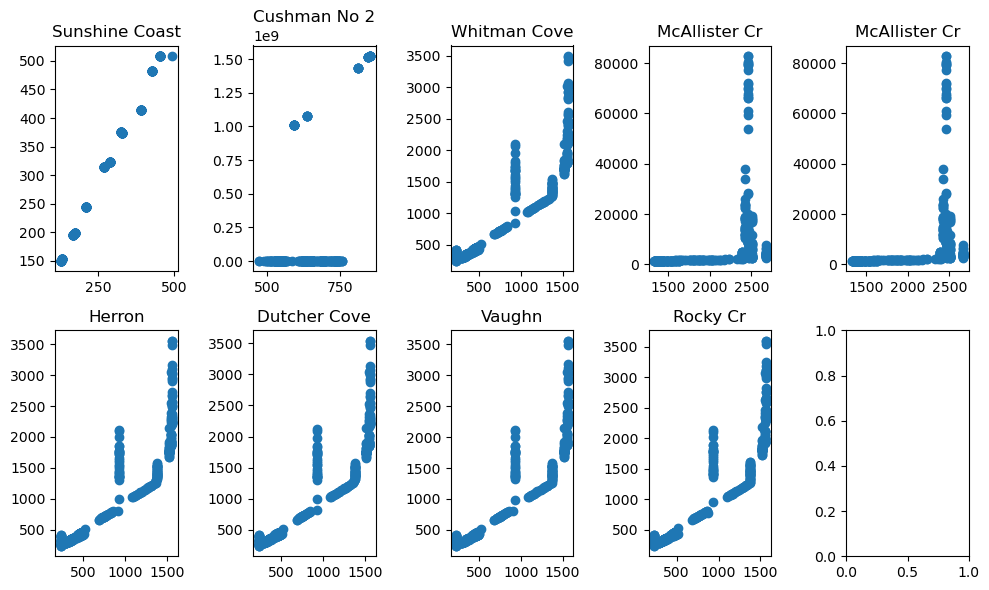

In [41]:
fig, axs = plt.subplots(2, 5, figsize=(10, 6))
for n,ax in zip(suspect_nodes, axs.flatten()):
    onesrc_orig = dfs['data'].xs(n, level=1)
    onesrc_new = newdata.xs(n, level=1)
    ax.scatter(onesrc_orig['dic'],
           onesrc_new['dic'])
    name = dfs['nodes'].loc[n, 'Name']
    ax.set_title(name)
fig.tight_layout()

Lake Cushman is clearly the worst offender here. Let's start by examining the Skokomish DIC since Cushman uses its regressions.

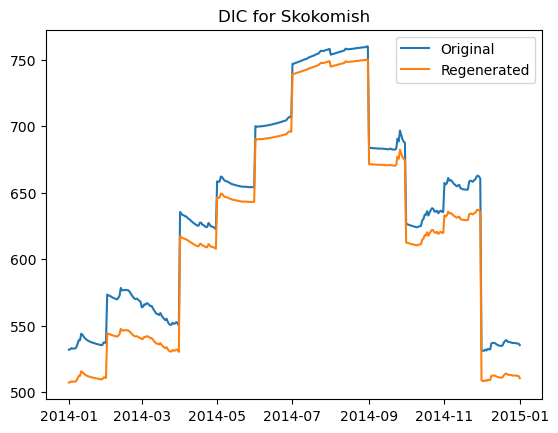

In [42]:
skok_orig_dic = dfs['data'].loc[(slice(None), 14138), :]['dic']
skok_new_dic = newdata.xs(14138, level=1)['dic']
fig, ax = plt.subplots()
ax.plot(dates, skok_orig_dic, label='Original')
ax.plot(dates, skok_new_dic, label='Regenerated')
ax.set_title('DIC for Skokomish')
ax.legend()

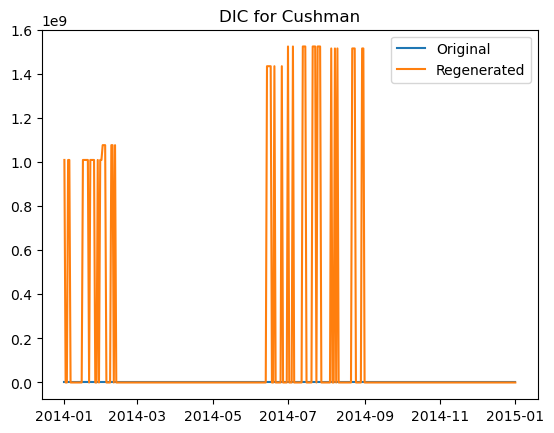

In [43]:
cush_orig_dic = dfs['data'].loc[(slice(None), 13429), :]['dic']
cush_new_dic = newdata.xs(13429, level=1)['dic']
fig, ax = plt.subplots()
ax.plot(dates, cush_orig_dic, label='Original')
ax.plot(dates, cush_new_dic, label='Regenerated')
ax.set_title('DIC for Cushman')
ax.legend()

Is the pH reasonable?

/home/benr/mambaforge/envs/ssm-analysis/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/benr/src/ssm-analysis/input_files/apply_regressions.py:214: RuntimeWarning: invalid value encountered in matmul
  predict_log = bs0[0] + (np.array([np.log10(q), np.log10(q) ** 2,


Text(0.5, 1.0, 'Calculated pH for Cushman')

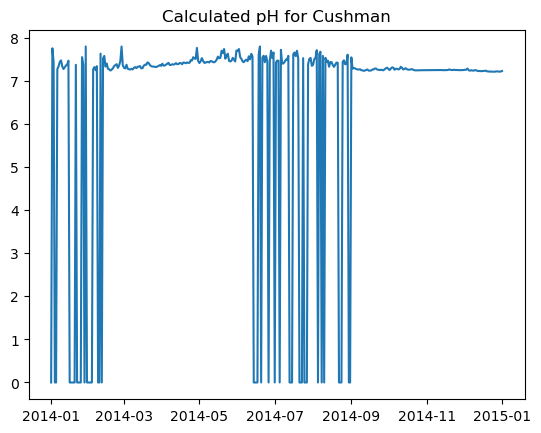

In [44]:
sid = 442
nodes = [13429]
q = newdata.loc[newdata.index.get_level_values(1).isin(nodes), 'discharge']
assert not np.any(pd.isna(q))
a = inflows_df.loc[sid, 'Drainage Area (mi2)'] * 1.6093 ** 2
x = [q.groupby(level=0).sum() / a, apply_regressions.dates_to_year_frac(q.index.levels[0])]

bs, actual_regname = pick_regression('Cushman No 2', 'Skokomish River', 'pH')
p = apply_regressions.do_regression(x, *bs)
fig, ax = plt.subplots()
ax.plot(dates, p)
ax.set_title('Calculated pH for Cushman')

Ah! My `do_regression` function is setting pH to 0 when flow is 0. I need to carry that logic forward to DIC computation.

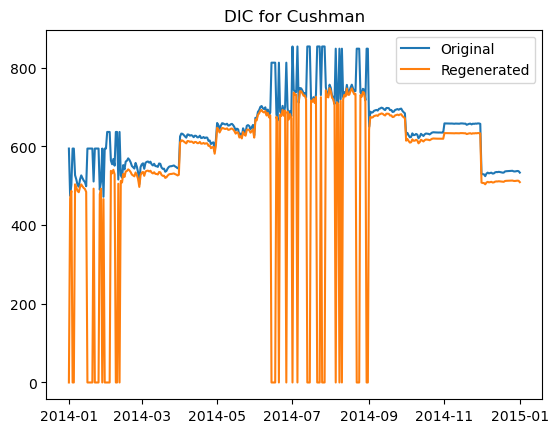

In [45]:
# [H+] and [OH-] concentrations
hpl = 10 ** -p
ohm = 10 ** (p-14)
# Alkalinity doesn't vary by year so just use what we have already
alk = newdata.loc[(slice(None),nodes[0]), 'talk'].to_numpy()
# Assume alkalinity is dominated by the carbonate system
# We could include ammonium and phosphate species but these should be rounding errors
# Eq 5.39 and 5.40 from Benjamin
alph1 = 1 / (hpl / ka1 + 1 + ka2 / hpl)
alph2 = 1 / (hpl ** 2 / (ka1 * ka2) + hpl / ka2 + 1)
# Eq 8.21b from Benjamin
dic = ((alk + hpl - ohm) / (alph1 + alph2))
# Convert pH=0 to DIC=0 (this is caused by periods of zero discharge)
cush_new_dic = np.where(q == 0, 0, dic)

fig, ax = plt.subplots()
ax.plot(dates, cush_orig_dic, label='Original')
ax.plot(dates, cush_new_dic, label='Regenerated')
ax.set_title('DIC for Cushman')
ax.legend()

If you look past the different flow-missing values it looks about as good as Skokomish now. Just to verify, replace no-flow values with NaNs:

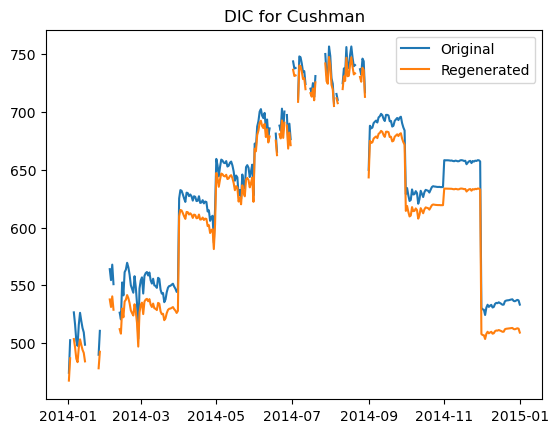

In [46]:
fig, ax = plt.subplots()
ax.plot(dates, np.where(q == 0, np.nan, cush_orig_dic), label='Original')
ax.plot(dates, np.where(q == 0, np.nan, cush_new_dic), label='Regenerated')
ax.set_title('DIC for Cushman')
ax.legend()

In [47]:
newdata = dfs['data'].copy()

for sid,group in dfs['nodes'].loc[dfs['nodes']['Source Type'] == 'River'].groupby('FVCOM ID'):
    nodes = group.index.values
    name = inflows_df.loc[sid, 'SSM2_Name']
    regname = inflows_df.loc[sid, 'WQ Regression']
    print(f'{sid}: {name} (nodes {", ".join(nodes.astype(str))})')
    if pd.isnull(regname):
        print('Skipping all regressions')
        continue
    q = newdata.loc[newdata.index.get_level_values(1).isin(nodes), 'discharge']
    assert not np.any(pd.isna(q))
    a = inflows_df.loc[sid, 'Drainage Area (mi2)'] * 1.6093 ** 2
    x = [q.groupby(level=0).sum() / a, apply_regressions.dates_to_year_frac(q.index.levels[0])]
    assert not np.any(pd.isna(x[0])), "Discharge after division and groupby contains NaNs"
    for inputc, regc in constit_map.items():
        bs, actual_regname = pick_regression(name, regname, regc)
        if np.all(pd.isnull(bs)):
            # No regression available, do not change original data
            print(f'Skipping {regc} (not available for {actual_regname})')
            continue
        p = apply_regressions.do_regression(x, *bs)
        assert not np.any(pd.isna(p)), f'{regc} from {actual_regname} contains NaNs'
        if inputc not in newdata.columns and 'l' + inputc in newdata.columns:
            # Proportion the concentrations into labile and refractory fractions
            print(f'Updating {regc} labile and refractory (using {actual_regname})')
            for n in nodes:
                newdata.loc[(slice(None),n), 'l' + inputc] = lr_fractions[inputc] * p
                newdata.loc[(slice(None),n), 'r' + inputc] = (1 - lr_fractions[inputc]) * p
        else:
            print(f'Updating {regc} (using {actual_regname})')
            for n in nodes:
                newdata.loc[(slice(None),n), inputc] = p
    # Organic N+P
    regmethod = int(inflows_df.loc[sid, 'WQ Regression Method'][0])
    dtpn_bs, actual_regname = pick_regression(name, regname, 'DTPN')
    tpn_bs, actual_regname = pick_regression(name, regname, 'TPN')
    if regmethod in (1, 2):
        din = newdata.loc[(slice(None),nodes[0]), ['no32','nh4']].sum(axis=1)
        tpn = apply_regressions.do_regression(x, *tpn_bs)
        if regmethod == 1: # DTPN and DTP
            dtpn = apply_regressions.do_regression(x, *dtpn_bs)
            don = dtpn - din
            don = np.where(don < 0, 0.001, don)
            pon = tpn - dtpn
            pon = np.where(pon < 0, 0.001, pon)
            print(f'Updating DON/PON labile and refractory (using DTPN)')
        else: # DTP only
            org_n = tpn - din
            don = np.where(org_n < 0, 0.001, 0.5 * org_n)
            pon = np.where(org_n < 0, 0.001, 0.5 * org_n)
            print(f'Updating DON/PON labile and refractory (using TPN/OrgN)')

        for n in nodes:
            newdata.loc[(slice(None),n), 'ldon'] = lr_fractions['don'] * don
            newdata.loc[(slice(None),n), 'rdon'] = (1 - lr_fractions['don']) * don
            newdata.loc[(slice(None),n), 'lpon'] = lr_fractions['pon'] * pon
            newdata.loc[(slice(None),n), 'rpon'] = (1 - lr_fractions['pon']) * pon
    # pH
    bs, actual_regname = pick_regression(name, regname, 'pH')
    if np.all(pd.isnull(bs)):
        print(f'Skipping pH (not available in {actual_regname})')
    else:
        p = apply_regressions.do_regression(x, *bs)
        # [H+] and [OH-] concentrations
        hpl = 10 ** -p
        ohm = 10 ** (p-14)
        # Alkalinity doesn't vary by year so just use what we have already
        alk = newdata.loc[(slice(None),nodes[0]), 'talk'].to_numpy()
        # Assume alkalinity is dominated by the carbonate system
        # We could include ammonium and phosphate species but these should be rounding errors
        # Eq 5.39 and 5.40 from Benjamin
        alph1 = 1 / (hpl / ka1 + 1 + ka2 / hpl)
        alph2 = 1 / (hpl ** 2 / (ka1 * ka2) + hpl / ka2 + 1)
        # Eq 8.21b from Benjamin
        dic = ((alk + hpl - ohm) / (alph1 + alph2))
        # Convert pH=0 to DIC=0 (this is caused by periods of zero discharge)
        dic = np.where(x[0] == 0, 0, dic)
        print(f'Updating pH (using {actual_regname})')
        if sid == 427:
            print(nodes)
            print(dic)
        for n in nodes:
            newdata.loc[(slice(None),n), 'dic'] = dic

301: Agate East (nodes 15634)
Updating DOC labile and refractory (using Skookum Creek)
Updating POC labile and refractory (using Skookum Creek)
Updating NH4N (using Skookum Creek)
Updating NO23N (using Skookum Creek)
Updating OP (using Skookum Creek)
Updating DO (using Skookum Creek)
Updating DON/PON labile and refractory (using DTPN)
Updating pH (using Skookum Creek)
302: Agate West (nodes 15936)
Updating DOC labile and refractory (using Skookum Creek)
Updating POC labile and refractory (using Skookum Creek)
Updating NH4N (using Skookum Creek)
Updating NO23N (using Skookum Creek)
Updating OP (using Skookum Creek)
Updating DO (using Skookum Creek)
Updating DON/PON labile and refractory (using DTPN)
Updating pH (using Skookum Creek)
303: Anderson east (nodes 14437)
Updating DOC labile and refractory (using Woodland Creek)
Updating POC labile and refractory (using Woodland Creek)
Updating NH4N (using Woodland Creek)
Updating NO23N (using Woodland Creek)
Updating OP (using Woodland Creek)

/home/benr/mambaforge/envs/ssm-analysis/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/benr/src/ssm-analysis/input_files/apply_regressions.py:214: RuntimeWarning: invalid value encountered in matmul
  predict_log = bs0[0] + (np.array([np.log10(q), np.log10(q) ** 2,


In [48]:
dic_comp = pd.DataFrame({'discharge': dfs['data']['discharge'],
                         'new': newdata['dic'],
                         'orig': dfs['data']['dic']}, index=newdata.index)
dic_comp.drop(dic_comp.loc[dic_comp['discharge'] == 0].index, inplace=True)
rmses = []
rmse_ns = []
for n,group in dic_comp.groupby(dic_comp.index.get_level_values(1)):
    rmse_ns.append(n)
    if np.any(pd.isna(group['orig'])):
        rmses.append(np.nan)
    else:
        rmses.append(root_mean_squared_error(group['new'], group['orig']) / group['orig'].mean())

rmses_ser = pd.Series(rmses, index=rmse_ns)
suspect_nodes = rmses_ser.loc[rmses_ser > 0.1].index
rmses_ser.loc[rmses_ser > 0.1]

8610     0.139094
15155    0.449813
15165    8.406437
15166    8.406437
15330    0.487811
15468    0.478248
15717    0.491317
15754    0.522631
dtype: float64

Well at least that fixed Cushman, but it doesn't look like it helped with anything else. Let's look at those fits again.

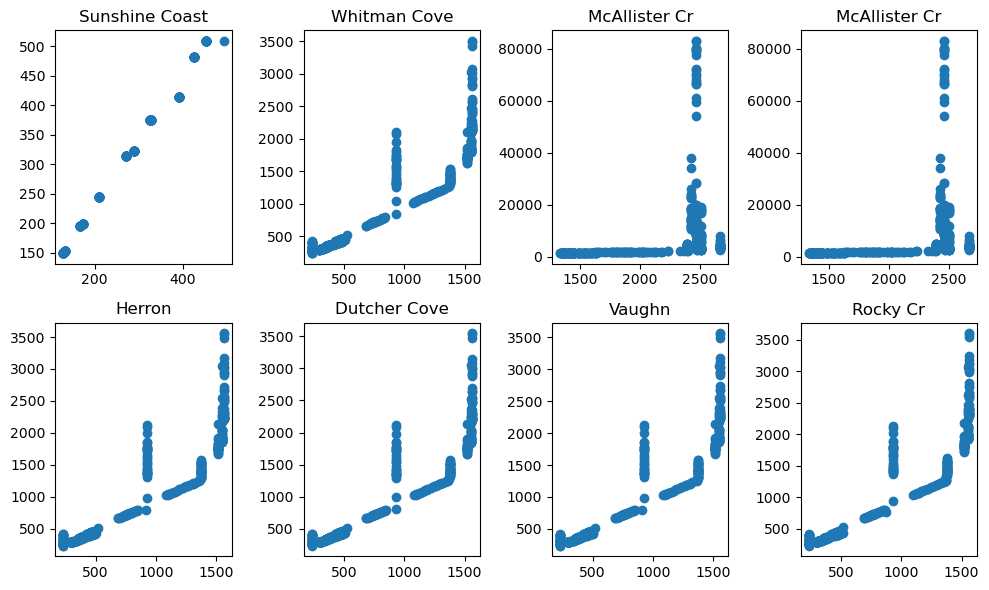

In [49]:
fig, axs = plt.subplots(2, 4, figsize=(10, 6))
for n,ax in zip(suspect_nodes, axs.flatten()):
    onesrc_orig = dfs['data'].xs(n, level=1)
    onesrc_new = newdata.xs(n, level=1)
    ax.scatter(onesrc_orig['dic'],
           onesrc_new['dic'])
    name = dfs['nodes'].loc[n, 'Name']
    ax.set_title(name)
fig.tight_layout()

Let's inpsect McAllister Creek (15165+15166, site ID 340) next since it now has the largest outliers. It has its own special set of regressions.

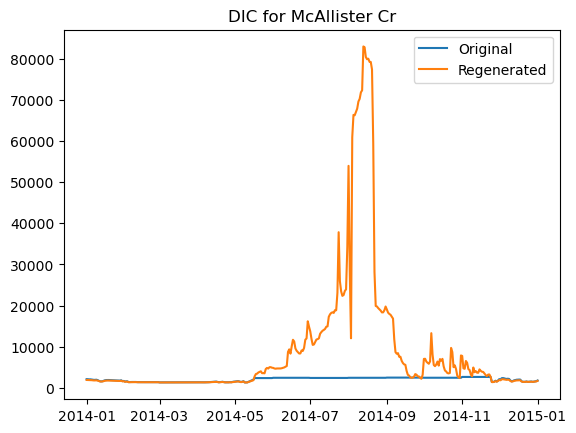

In [50]:
mcal_orig_dic = dfs['data'].loc[(slice(None), 15165), :]['dic']
mcal_new_dic = newdata.xs(15165, level=1)['dic']
fig, ax = plt.subplots()
ax.plot(dates, mcal_orig_dic, label='Original')
ax.plot(dates, mcal_new_dic, label='Regenerated')
ax.set_title('DIC for McAllister Cr')
ax.legend()

Text(0.5, 1.0, 'Calculated pH for McAllister Cr')

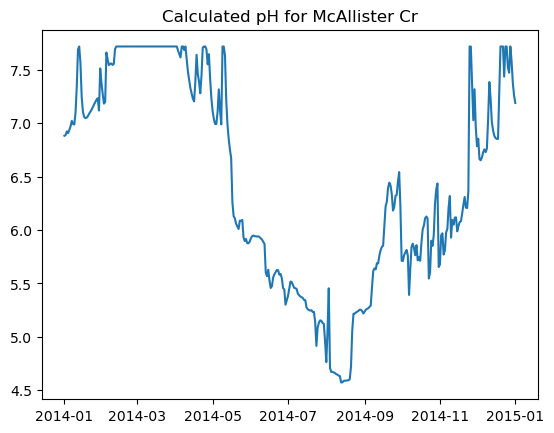

In [51]:
sid = 340
nodes = [15165,15166]
q = newdata.loc[newdata.index.get_level_values(1).isin(nodes), 'discharge']
assert not np.any(pd.isna(q))
a = inflows_df.loc[sid, 'Drainage Area (mi2)'] * 1.6093 ** 2
x = [q.groupby(level=0).sum() / a, apply_regressions.dates_to_year_frac(q.index.levels[0])]

bs, actual_regname = pick_regression('McAllister Cr', 'McAllister Creek', 'pH')
p = apply_regressions.do_regression(x, *bs)
fig, ax = plt.subplots()
ax.plot(dates, p)
ax.set_title('Calculated pH for McAllister Cr')

Okay, the pH regression is making the water too acidic. It looks like there's a maximum DIC imposed on the original data, let's figure out what that is.

2669.0

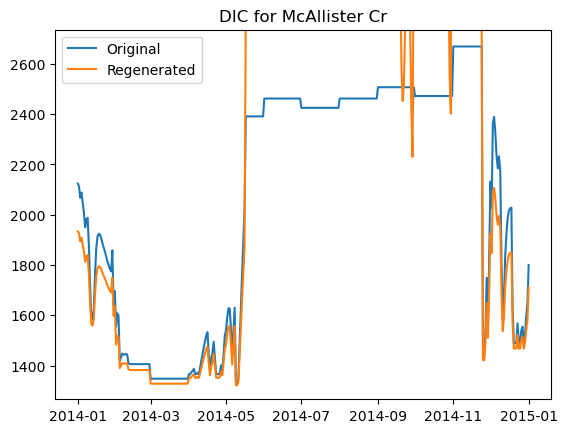

In [52]:
fig, ax = plt.subplots()
ax.plot(dates, mcal_orig_dic, label='Original')
xmin, xmax, ymin, ymax = ax.axis()
ax.plot(dates, mcal_new_dic, label='Regenerated')
ax.set(xbound=(xmin, xmax), ybound=(ymin, ymax), title='DIC for McAllister Cr')
ax.legend()
mcal_orig_dic.max()

Hmm, it's not a maximum DIC. Rather, it must be a minimum pH. Let's estimate Ecology's pH using known DIC/TALK and the carbonate system equations in reverse (proton condition). I'm also including other environmental sources of alkalinity (ammonia, phosphate) to see if that helps with the fit.

In [53]:
knh4 = 10 ** -9.24
k1po4 = 10 ** -2.15
k2po4 = 10 ** -7.12
k3po4 = 10 ** -12.38

def pcond(ph, alk, totco3, totnh3, totpo4):
    """Eq 8.21b from Benjamin"""
    hpl = 10 ** -ph
    ohm = 10 ** (ph-14)
    #alph1 = 1 / (hpl / ka1 + 1 + ka2 / hpl)
    #alph2 = 1 / (hpl ** 2 / (ka1 * ka2) + hpl / ka2 + 1)
    # Carbonate speciation; I re-derived these assuming gas exchange
    # and I think they're equivalent to the old ones
    alph1_co3 = ka1 * hpl / (hpl ** 2 + ka1 * hpl + ka1 * ka2)
    alph2_co3 = ka1 * ka2 / (hpl ** 2 + ka1 * hpl + ka1 * ka2)
    # Ammonia speciation
    alph_nh4 = knh4 / (hpl + knh4)
    # Phosphate speciation
    alph1_po4 = k1po4 * hpl ** 2 / (hpl ** 3 + k1po4 * hpl ** 2 + k1po4 * k2po4 * hpl + k1po4 * k2po4 * k3po4)
    alph2_po4 = k1po4 * k2po4 * hpl / (hpl ** 3 + k1po4 * hpl ** 2 + k1po4 * k2po4 * hpl + k1po4 * k2po4 * k3po4)
    alph3_po4 = k1po4 * k2po4 * k3po4 / (hpl ** 3 + k1po4 * hpl ** 2 + k1po4 * k2po4 * hpl + k1po4 * k2po4 * k3po4)
    return -hpl + ohm + totco3 * (alph1_co3 + 2 * alph2_co3) + totnh3 * alph_nh4 + totpo4 * (alph1_po4 + 2 * alph2_po4 + 3 * alph3_po4) - alk

ecol_ph = []
for d,row in dfs['data'].xs(15165, level=1).iterrows():
    alk = row['talk']
    dic = row['dic']
    po4 = row['po4'] / 30.974
    nh4 = row['nh4'] / 14.007
    result = root(pcond, 7., args=(alk, dic, nh4, po4))
    assert result.success, result
    ecol_ph.append(result.x[0])

6.369055239827788

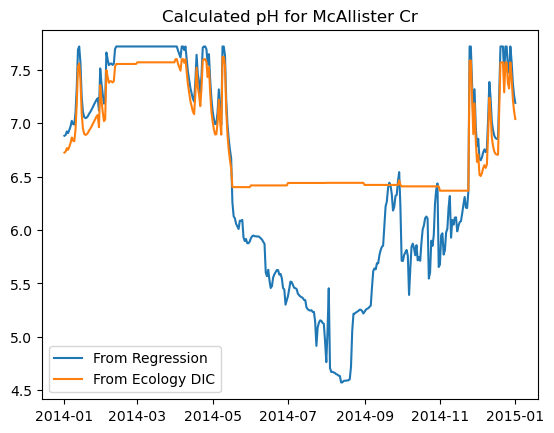

In [54]:
fig, ax = plt.subplots()
ax.plot(dates, p, label='From Regression')
ax.plot(dates, ecol_ph, label='From Ecology DIC')
ax.set_title('Calculated pH for McAllister Cr')
ax.legend()
np.min(ecol_ph)

The minimum above is a bit less than 6.4, but my calculation methods still have a bias to them even when I fix an error and switch to open system speciation. I'm guessing Ecology is using a floor of 6.5 for pH.

Ammonia and phosphate don't make the fit any better, so I'm not sure why my methods aren't dead-on.

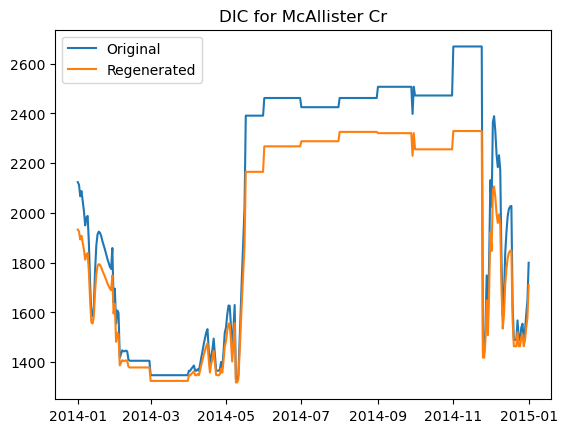

In [55]:
ph = np.where(p < 6.5, 6.5, p)
# [H+] and [OH-] concentrations
hpl = 10 ** -ph
ohm = 10 ** (ph-14)
# Alkalinity doesn't vary by year so just use what we have already
alk = newdata.loc[(slice(None),nodes[0]), 'talk'].to_numpy()
# Assume alkalinity is dominated by the carbonate system
# We could include ammonium and phosphate species but these should be rounding errors
# Carbonate speciation with gas exchange
alph1 = ka1 * hpl / (hpl ** 2 + ka1 * hpl + ka1 * ka2)
alph2 = ka1 * ka2 / (hpl ** 2 + ka1 * hpl + ka1 * ka2)
# Eq 8.21b from Benjamin
dic = ((alk + hpl - ohm) / (alph1 + 2 * alph2))
# Set zero discharge periods to DIC=0
mcal_new_dic = np.where(x == 0, 0, dic)

fig, ax = plt.subplots()
ax.plot(dates, mcal_orig_dic, label='Original')
ax.plot(dates, mcal_new_dic, label='Regenerated')
ax.set_title('DIC for McAllister Cr')
ax.legend()

We're only off by 1-10 percent now, which is good enough. Update the code and re-run.

In [56]:
newdata = dfs['data'].copy()

for sid,group in dfs['nodes'].loc[dfs['nodes']['Source Type'] == 'River'].groupby('FVCOM ID'):
    nodes = group.index.values
    name = inflows_df.loc[sid, 'SSM2_Name']
    regname = inflows_df.loc[sid, 'WQ Regression']
    print(f'{sid}: {name} (nodes {", ".join(nodes.astype(str))})')
    if pd.isnull(regname):
        print('Skipping all regressions')
        continue
    q = newdata.loc[newdata.index.get_level_values(1).isin(nodes), 'discharge']
    assert not np.any(pd.isna(q))
    a = inflows_df.loc[sid, 'Drainage Area (mi2)'] * 1.6093 ** 2
    x = [q.groupby(level=0).sum() / a, apply_regressions.dates_to_year_frac(q.index.levels[0])]
    assert not np.any(pd.isna(x[0])), "Discharge after division and groupby contains NaNs"
    for inputc, regc in constit_map.items():
        bs, actual_regname = pick_regression(name, regname, regc)
        if np.all(pd.isnull(bs)):
            # No regression available, do not change original data
            print(f'Skipping {regc} (not available for {actual_regname})')
            continue
        p = apply_regressions.do_regression(x, *bs)
        assert not np.any(pd.isna(p)), f'{regc} from {actual_regname} contains NaNs'
        if inputc not in newdata.columns and 'l' + inputc in newdata.columns:
            # Proportion the concentrations into labile and refractory fractions
            print(f'Updating {regc} labile and refractory (using {actual_regname})')
            for n in nodes:
                newdata.loc[(slice(None),n), 'l' + inputc] = lr_fractions[inputc] * p
                newdata.loc[(slice(None),n), 'r' + inputc] = (1 - lr_fractions[inputc]) * p
        else:
            print(f'Updating {regc} (using {actual_regname})')
            for n in nodes:
                newdata.loc[(slice(None),n), inputc] = p
    # Organic N+P
    regmethod = int(inflows_df.loc[sid, 'WQ Regression Method'][0])
    dtpn_bs, actual_regname = pick_regression(name, regname, 'DTPN')
    tpn_bs, actual_regname = pick_regression(name, regname, 'TPN')
    if regmethod in (1, 2):
        din = newdata.loc[(slice(None),nodes[0]), ['no32','nh4']].sum(axis=1)
        tpn = apply_regressions.do_regression(x, *tpn_bs)
        if regmethod == 1: # DTPN and DTP
            dtpn = apply_regressions.do_regression(x, *dtpn_bs)
            don = dtpn - din
            don = np.where(don < 0, 0.001, don)
            pon = tpn - dtpn
            pon = np.where(pon < 0, 0.001, pon)
            print(f'Updating DON/PON labile and refractory (using DTPN)')
        else: # DTP only
            org_n = tpn - din
            don = np.where(org_n < 0, 0.001, 0.5 * org_n)
            pon = np.where(org_n < 0, 0.001, 0.5 * org_n)
            print(f'Updating DON/PON labile and refractory (using TPN/OrgN)')

        for n in nodes:
            newdata.loc[(slice(None),n), 'ldon'] = lr_fractions['don'] * don
            newdata.loc[(slice(None),n), 'rdon'] = (1 - lr_fractions['don']) * don
            newdata.loc[(slice(None),n), 'lpon'] = lr_fractions['pon'] * pon
            newdata.loc[(slice(None),n), 'rpon'] = (1 - lr_fractions['pon']) * pon
    elif np.all(pd.isnull(tpn_bs)):
        print('Skipping DON/PON (not available)')
    else:
        print('Skipping DON/PON (available but not supposed to be used)')
    # pH
    bs, actual_regname = pick_regression(name, regname, 'pH')
    if np.all(pd.isnull(bs)):
        print(f'Skipping pH (not available in {actual_regname})')
    else:
        p = apply_regressions.do_regression(x, *bs)
        ph = np.where(p < 6.5, 6.5, p)
        # [H+] and [OH-] concentrations
        hpl = 10 ** -ph
        ohm = 10 ** (ph-14)
        # Alkalinity doesn't vary by year so just use what we have already
        alk = newdata.loc[(slice(None),nodes[0]), 'talk'].to_numpy()
        # Assume alkalinity is dominated by the carbonate system
        # We could include ammonium and phosphate species but these should be rounding errors
        # Carbonate speciation with gas exchange
        alph1 = ka1 * hpl / (hpl ** 2 + ka1 * hpl + ka1 * ka2)
        alph2 = ka1 * ka2 / (hpl ** 2 + ka1 * hpl + ka1 * ka2)
        # Eq 8.21b from Benjamin
        dic = ((alk + hpl - ohm) / (alph1 + 2 * alph2))
        # Set zero discharge periods to DIC=0
        mcal_new_dic = np.where(x[0] == 0, 0, dic)
        print(f'Updating pH (using {actual_regname})')
        for n in nodes:
            newdata.loc[(slice(None),n), 'dic'] = dic

301: Agate East (nodes 15634)
Updating DOC labile and refractory (using Skookum Creek)
Updating POC labile and refractory (using Skookum Creek)
Updating NH4N (using Skookum Creek)
Updating NO23N (using Skookum Creek)
Updating OP (using Skookum Creek)
Updating DO (using Skookum Creek)
Updating DON/PON labile and refractory (using DTPN)
Updating pH (using Skookum Creek)
302: Agate West (nodes 15936)
Updating DOC labile and refractory (using Skookum Creek)
Updating POC labile and refractory (using Skookum Creek)
Updating NH4N (using Skookum Creek)
Updating NO23N (using Skookum Creek)
Updating OP (using Skookum Creek)
Updating DO (using Skookum Creek)
Updating DON/PON labile and refractory (using DTPN)
Updating pH (using Skookum Creek)
303: Anderson east (nodes 14437)
Updating DOC labile and refractory (using Woodland Creek)
Updating POC labile and refractory (using Woodland Creek)
Updating NH4N (using Woodland Creek)
Updating NO23N (using Woodland Creek)
Updating OP (using Woodland Creek)

/home/benr/mambaforge/envs/ssm-analysis/lib/python3.10/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/benr/src/ssm-analysis/input_files/apply_regressions.py:214: RuntimeWarning: invalid value encountered in matmul
  predict_log = bs0[0] + (np.array([np.log10(q), np.log10(q) ** 2,


In [57]:
dic_comp = pd.DataFrame({'discharge': dfs['data']['discharge'],
                         'new': newdata['dic'],
                         'orig': dfs['data']['dic']}, index=newdata.index)
dic_comp.drop(dic_comp.loc[dic_comp['discharge'] == 0].index, inplace=True)
rmses = []
rmse_ns = []
for n,group in dic_comp.groupby(dic_comp.index.get_level_values(1)):
    rmse_ns.append(n)
    if np.any(pd.isna(group['orig'])):
        rmses.append(np.nan)
    else:
        rmses.append(root_mean_squared_error(group['new'], group['orig']) / group['orig'].mean())

rmses_ser = pd.Series(rmses, index=rmse_ns)
suspect_nodes = rmses_ser.loc[rmses_ser > 0.1].index
rmses_ser.loc[rmses_ser > 0.1]

8610    0.138544
dtype: float64

Yes! The only remaining problem is Sunshine Coast which is plotted earlier and is just barely outside the target RMSE. I think this is acceptable.

In [58]:
doc_comp = pd.DataFrame({'discharge': dfs['data']['discharge'],
                         'new': newdata['ldoc'],
                         'orig': dfs['data']['ldoc']}, index=newdata.index)
doc_comp.drop(doc_comp.loc[doc_comp['discharge'] == 0].index, inplace=True)
rmses = []
rmse_ns = []
for n,group in doc_comp.groupby(doc_comp.index.get_level_values(1)):
    rmse_ns.append(n)
    if np.any(pd.isna(group['orig'])):
        rmses.append(np.nan)
    else:
        rmses.append(root_mean_squared_error(group['new'], group['orig']) / group['orig'].mean())

rmses_ser = pd.Series(rmses, index=rmse_ns)
suspect_nodes = rmses_ser.loc[rmses_ser > 0.1].index
rmses_ser.loc[rmses_ser > 0.1]

/tmp/ipykernel_3027104/3750656674.py:12: RuntimeWarning: invalid value encountered in scalar divide
  rmses.append(root_mean_squared_error(group['new'], group['orig']) / group['orig'].mean())
/tmp/ipykernel_3027104/3750656674.py:12: RuntimeWarning: invalid value encountered in scalar divide
  rmses.append(root_mean_squared_error(group['new'], group['orig']) / group['orig'].mean())


8778     0.182241
8861     0.182241
10991    0.595422
10992    0.595422
15856    0.294636
15873    0.294636
dtype: float64

Errors are coming from Fraser River, Lake Washington, and Capitol Lake. All that can be explained by Ecology's data using actual measurements rather than the regressions.

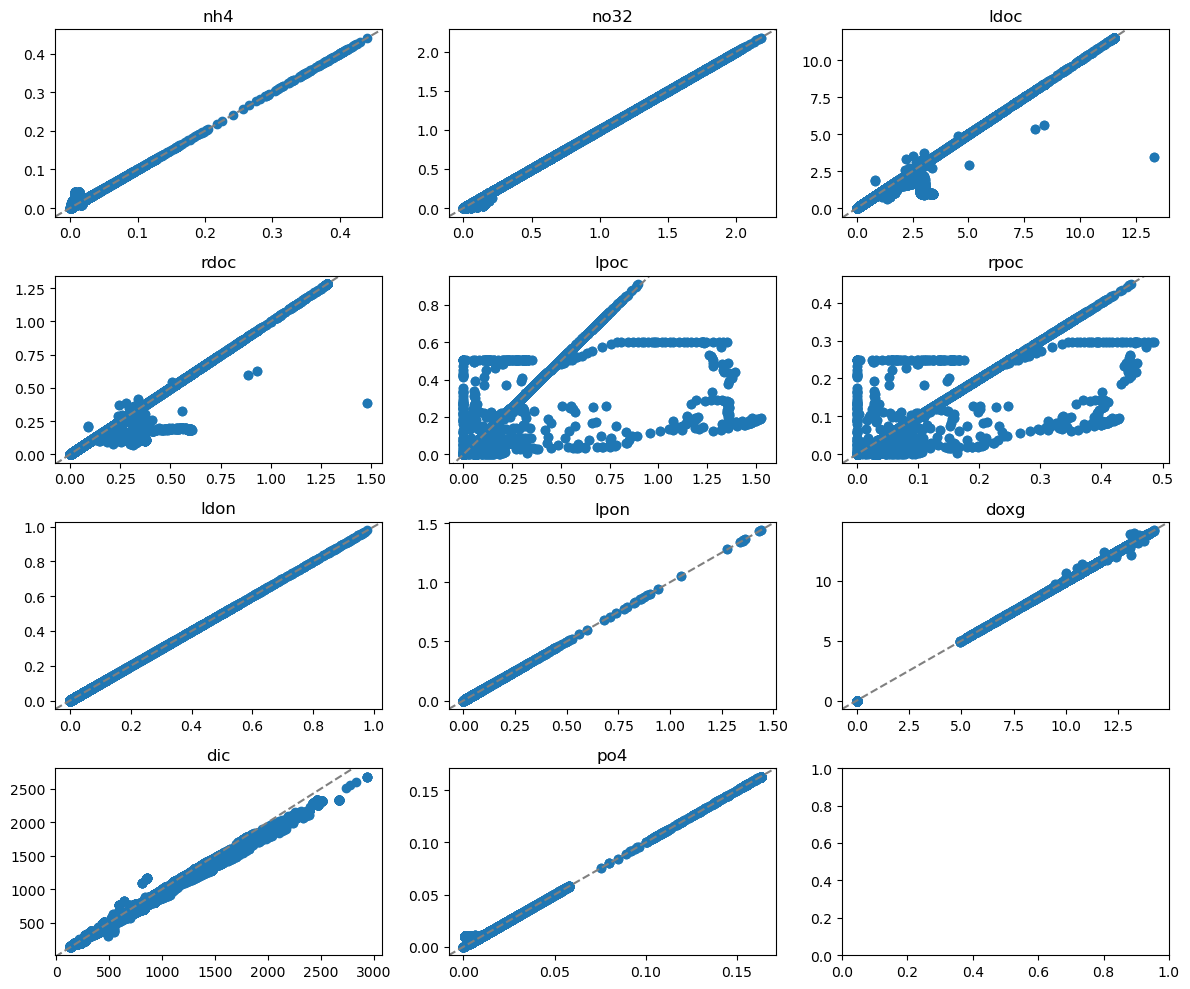

In [59]:
fig, axs = plt.subplots(4, 3, figsize=(12,10))

riv_nodes = dfs['nodes'].loc[dfs['nodes']['Source Type'] == 'River'].index
rivs_only_orig = dfs['data'].loc[np.isin(dfs['data'].index.get_level_values(1), riv_nodes)].sort_index()
rivs_only_new = newdata.loc[np.isin(newdata.index.get_level_values(1), riv_nodes)].sort_index()
for ax,constit in zip(axs.flatten(), ('nh4','no32','ldoc','rdoc','lpoc','rpoc','ldon','lpon','doxg','dic','po4',None)):
    if constit is None:
        break
    ax.scatter(rivs_only_orig[constit], rivs_only_new[constit])
    xmin, xmax, ymin, ymax = ax.axis()
    fitline = [xmin if xmin < ymin else ymin, xmax if xmax > ymax else ymax]
    ax.plot(fitline, fitline, color='gray', linestyle='--')
    ax.set(title=constit, xbound=(xmin, xmax), ybound=(ymin, ymax))
fig.tight_layout()